<h2 style="text-align:center;font-size:200%;;">Pyspark для исследовательского анализа данных </h2>
<h3  style="text-align:center;">

<span class="label label-success">- Ленивая оценка</span>

<span class="label label-success">- Регистрация UDF</span>

<span class="label label-success">- Spark RDD</span>

<span class="label label-success">- Обработка данных</span>

<span class="label label-success">- Анализ данных</span>

<span class="label label-success">- Визуализация данных</span></h3>

## Преимущества изучения Pyspark

* Если компания планирует реализовать проект с действительно большим набором данных, Spark — <font color="red"><b>отличный выбор</b></font> .
Сравнительный анализ использования большого объема данных между `Pyspark` и `Pandas` по данным Датабрикс:  
![Spark_vs_Pandas.jpg](https://drive.google.com/uc?export=view&id=142bUyKI5BqOAkXRsYpOQoRCJ3YDOHS5R)


* Если вы планируете устроиться на работу в компанию с действительно большой экосистемой данных, знание Spark будет хорошим плюсом и отличает вас от других соискателей.


Ознакомиться с экосистемой `Spark`
 :https://www.kaggle.com/tientd95/pyspark-for-data-science

или сомтреть файл `pyspark-for-data-science.ipynb`

# **1. Инициализация платформы Spark и загрузка данных в фрейм данных Spark** <a class="anchor" id="1"></a>

[Go back to table of contents](#0.1)


Источник данных `1`: https://drive.google.com/file/d/1yiAp1fFDy3wSqUR0X_btCZPtuczbLwCe/view?usp=drive_link

Источник данных `2`: https://disk.yandex.ru/d/HKtMWSuqglgaXg

Этот набор данных предназначен для расчета частоты пульса у людей, а также других связанных с этим характеристик: пола, погодных условий, вида спорта, GPS и т.д.

In [2]:
# Импорт модулей, не связанныех с PySpark.
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# Это помогает автоматически распечатывать элементы без явного использования «печати».
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

ЗАДАНИЕ 1:
Основные библиотеки Python (кроме PySpark), используемые в работе:
1. pandas - для работы с табличными данными в памяти, визуализации и анализа
2. numpy - для числовых операций и работы с массивами
3. matplotlib - для построения графиков и визуализации данных
4. seaborn (неявно) - для статистической графики (хотя в коде не импортирован явно)
5. datetime - для работы с датами и временем
6. math - для математических операций
7. statistics - для статистических вычислений

Их роль в анализе данных:
- pandas: преобразование Spark DataFrame в Pandas DataFrame для локальной обработки
- numpy: математические операции, статистика, работа с массивами
- matplotlib: визуализация результатов анализа, построение графиков
- datetime: обработка временных меток, расчет длительности
- math/matplotlib.ticker: форматирование графиков
- IPython: интерактивная работа в Jupyter/Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
!mkdir pyspark2024

In [6]:
ls

drive/  pyspark2024/  sample_data/


In [7]:
cd pyspark2024

/content/pyspark2024


In [21]:
!unzip "/content/drive/MyDrive/endomondoHR.json.zip"

Archive:  /content/drive/MyDrive/endomondoHR.json.zip
replace endomondoHR.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
ls

In [13]:
! pip install pyspark

In [24]:
# Импорт модулей, связанных с PySpark.
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Инициализировать сеанс Spark.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = 'endomondoHR.json' # Загрузите данные в текущий каталог Colab.
# filename_data = 'data/endomondoHR.json' # Загрузите данные в каталог data/  при работе в Docker.
# Загрузите основной набор данных в фрейм данных pyspark.
df = spark.read.json(filename_data, mode="DROPMALFORMED")
print('Data frame type: ' + str(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


# **2. Обзор набора данных** <a class="anchor" id="2"></a>

[Go back to table of contents](#0.1)

### Схема, столбцы и типы данных набора:
   *Набор данных содержит как столбцы с одним значением (int, string), так и столбцы, состоящие из списка массивов.*

In [25]:
print('Обзор данных')
df.printSchema()
print('Обзор столбцов')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Обзор данных
root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)

Обзор столбцов


Column Name      Data type
0     altitude  array<double>
1       gender         string
2   heart_rate  array<bigint>
3           id         bigint
4     latitude  array<double>
5    longitude  array<double>
6        speed  array<double>
7        sport         string
8    timestamp  array<bigint>
9          url         string
10      userId         bigint

In [26]:
print('Описание фрейма данных (только строковые и числовые столбцы):')
df.describe().toPandas()

print(f'Общее количество {df.count()} строк, печатаем несколько первых строк:')
df.limit(2).toPandas()

Описание фрейма данных (только строковые и числовые столбцы):


summary   gender                    id     sport  \
0   count    42494                 42494     42494   
1    mean     None  3.6443379401268417E8      None   
2  stddev     None  1.5607252098440665E8      None   
3     min   female               3930381  aerobics   
4     max  unknown             665769165      yoga   

                                                 url             userId  
0                                              42494              42494  
1                                               None  4663735.764507931  
2                                               None  4155078.887917138  
3  https://www.endomondo.com/users/10057948/worko...              16786  
4  https://www.endomondo.com/users/9985340/workou...           15279967

Общее количество 42494 строк, печатаем несколько первых строк:


altitude gender  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   male   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   male   

                                          heart_rate         id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038   

                                            latitude  \
0  [60.173348765820265, 60.173239801079035, 60.17...   
1  [60.173247596248984, 60.17320962622762, 60.172...   

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   

                                               speed sport  \
0  [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...  bike   
1  [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...  bike   

                                           timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   

                                                 url    userId  
0  https://www.endomondo.com/users/10921915/worko...  10921915  
1  https://www.endomondo.com/users/10921915/worko...  10921915

# **3. Обнаружение пропущенных значений и аномальных нулей.** <a class="anchor" id="3"></a>

[Go back to table of contents](#0.1)

После предварительного просмотра столбцов первое, что должны проверить, — это наличие в наборе данных какого-либо пропущенного значения.
– Для строковых столбцов  проверяем наличие `None` и `null`.
- Для числовых столбцов проверяем наличие нулей и `NaN`.
- Для столбцов типа массив проверяем, содержит ли массив нули или `NaN`.


In [27]:
print('Обзор столбцов')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Обзор столбцов


Column Name      Data type
0     altitude  array<double>
1       gender         string
2   heart_rate  array<bigint>
3           id         bigint
4     latitude  array<double>
5    longitude  array<double>
6        speed  array<double>
7        sport         string
8    timestamp  array<bigint>
9          url         string
10      userId         bigint

In [28]:
string_columns = ['gender', 'sport', 'url']
numeric_columns = ['id','userId']
array_columns = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']
missing_values = {}
for index, column in enumerate(df.columns):
    if column in string_columns:    # проверить столбцы строк со значениями None и Null
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#         missing_values.update({column: missing_count})
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column:missing_count})
    if column in numeric_columns:  # check zeroes, None, NaN
        missing_count = df.where(col(column).isin([0,None,np.nan])).count()
        missing_values.update({column:missing_count})
    if column in array_columns:  # check zeros and NaN
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column:missing_count})
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

altitude  gender  heart_rate  id  latitude  longitude  speed  sport  \
0      6786       0         308   0         7          7   1316      0   

   timestamp  url  userId  
0          0    0       0

In [29]:
#  создаем новый столбец для подсчета количества временных меток, записанных для каждой строки/тренировки, с именем столбца «PerWorkoutRecordCount».
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))


# Эта часть написана как функция, которую можно будет использовать позже.
def user_activity_workout_summarize(df):
    user_count = format(df.select('userId').distinct().count(), ',d')
    workout_count = format(df.select('id').distinct().count(), ',d')
    activity_count = str(df.select('sport').distinct().count())
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0],',d')
    columns=['Users count', 'Activity types count','Workouts count', 'Total records count']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    gender_user_count = df.select('gender','userId').distinct().groupBy('gender').count().toPandas()
    gender_activities_count = df.groupBy('gender').count().toPandas()
    gender_user_activity_count = gender_user_count.join(
        gender_activities_count.set_index('gender'), on='gender'
        , how='inner', lsuffix='_gu'
    )
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']

    return sum_df, gender_user_activity_count

sum_dfs= user_activity_workout_summarize(df)
print('\nОбщая сводка набора данных о пользователях, тренировках и количестве записей (предварительная фильтрация):')
sum_dfs[0]


Общая сводка набора данных о пользователях, тренировках и количестве записей (предварительная фильтрация):


Users count Activity types count Workouts count Total records count
0         189                   30         42,494          18,759,087

Как мы видим, общее количество записей для этого набора данных превышает 111 миллионов записей. Это действительно большой размер

In [30]:
print('Количество тренировок с менее чем 50 записями и статистической сводкой:')
removed_df = df.select('PerWorkoutRecordCount').where(df.PerWorkoutRecordCount < 50) \
               .toPandas().describe().astype(int)
removed_df.rename(columns = {'PerWorkoutRecordCount': 'PerWorkoutRecordCount <50'}, inplace=True)
removed_df.T

Количество тренировок с менее чем 50 записями и статистической сводкой:


count  mean  std  min  25%  50%  75%  max
PerWorkoutRecordCount <50    710    21   15    1    6   18   36   49

# **4. Ленивая оценка Pyspark** <a class="anchor" id="4"></a>

[Go back to table of contents](#0.1)

Здесь мы начнем знакомиться с некоторыми функциями продвинутого `Spark`: **Ленивая оценка**.

<font color="red"><b>Ленивая оценка</b></font> расширяет возможности Apache Spark за счет сокращения времени выполнения операций RDD. Он поддерживает граф происхождения для запоминания операций над RDD. мы можем просто помнить, что вся обработка в Pyspark — это абстракция. Когда мы хотим вернуть результаты, мы на самом деле сообщаем Spark, какой конечный ответ вас интересует, и он определяет лучший способ получить его. В результате это оптимизирует производительность и обеспечивает отказоустойчивость.

Чтобы увидеть результат, нам нужно вызвать `Spark.collect()`.

Обычно можем показать результаты с помощью синтаксиса: `df.take(k)` или `df.limit(k)`, чтобы получить результаты с `k`-строкой.

Когда `K` становится большим числом, выполнение этих двух способов, описанных выше, занимает много времени. Потому что приведенный выше синтаксис не использовал возможности обработки `Pyspark` (ленивая оценка).
Чтобы быстро обработать, требуется использовать `df.collect()[:k]` для возврата строки `k`, которая нам требуется.

Подробнее о ленивых вычислениях `Pyspark` можно прочитать в статье : https://data-flair.training/blogs/apache-spark-lazy-evaluation/

In [31]:
ranked_sport_users_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

# Топ-5 типов тренировок
highest_sport_users_df = ranked_sport_users_df.limit(5).toPandas()
# Переименование имени столбца: 'count' -> Users count Количество пользователей.
highest_sport_users_df.rename(columns = {'count':'Users count'}, inplace = True)
# Подсчет общего количества пользователей. Результат потребуется для подсчета процентного соотношения.
total_sports_users = ranked_sport_users_df.groupBy().sum().collect()[0][0]

In [32]:
ranked_sport_users_df.collect()[:5]

[Row(sport='run', count=150),
 Row(sport='bike', count=135),
 Row(sport='mountain bike', count=52),
 Row(sport='bike (transport)', count=44),
 Row(sport='core stability training', count=34)]

# **5. Исследовательский анализ данных** <a class="anchor" id="5"></a>

[Go back to table of contents](#0.1)

Давайте сначала составим таблицу, указав 5 лучших типов тренировок, которые мы оценили выше.

Топ-5 видов спорта, в которых участвует больше всего пользователей:
                     sport  Users count  percentage
0                      run          150   26.595745
1                     bike          135   23.936170
2            mountain bike           52    9.219858
3         bike (transport)           44    7.801418
4  core stability training           34    6.028369
5                   others          149   26.418440


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Вид спортивных увлечений')

Text(0.5, 0, 'Вид спорта')

Text(0, 0.5, 'Количество пользователей')

/tmp/ipython-input-3402482701.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(highest_sport_users_df_renamed['sport'], rotation='vertical', fontsize='small')


[Text(0, 0, 'run'),
 Text(1, 0, 'bike'),
 Text(2, 0, 'mountain bike'),
 Text(3, 0, 'bike (transport)'),
 Text(4, 0, 'core stability training'),
 Text(5, 0, 'others')]

([<matplotlib.patches.Wedge at 0x7cb08c06fa40>,
 [Text(-0.889982723592105, 0.8049414585593034, 'run'),
  Text(-0.7899573303467997, -0.9033091476517645, 'bike'),
  Text(0.44447289731878314, -1.3275706548237074, 'mountain bike'),
  Text(1.058977575049031, -0.9157327642621913, 'bike (transport)'),
  Text(1.3460528125250515, -0.3848919665222936, 'core stability training'),
  Text(0.8854852574352094, 0.8098863246560599, 'others')],
 [Text(-0.5191565887620613, 0.4695491841595937, '26.6%'),
  Text(-0.46080844270229976, -0.526930336130196, '23.9%'),
  Text(0.2857325768477891, -0.8534382781009545, '9.2%'),
  Text(0.6807712982458055, -0.5886853484542658, '7.8%'),
  Text(0.865319665194676, -0.24743054990718877, '6.0%'),
  Text(0.5165330668372055, 0.4724336893827016, '26.4%')])

Text(0.5, 1.0, 'Вид спортивных увлечений')

Text(0.5, 1.02, 'Топ-5 видов спорта, в которых участвует больше всего пользователей')

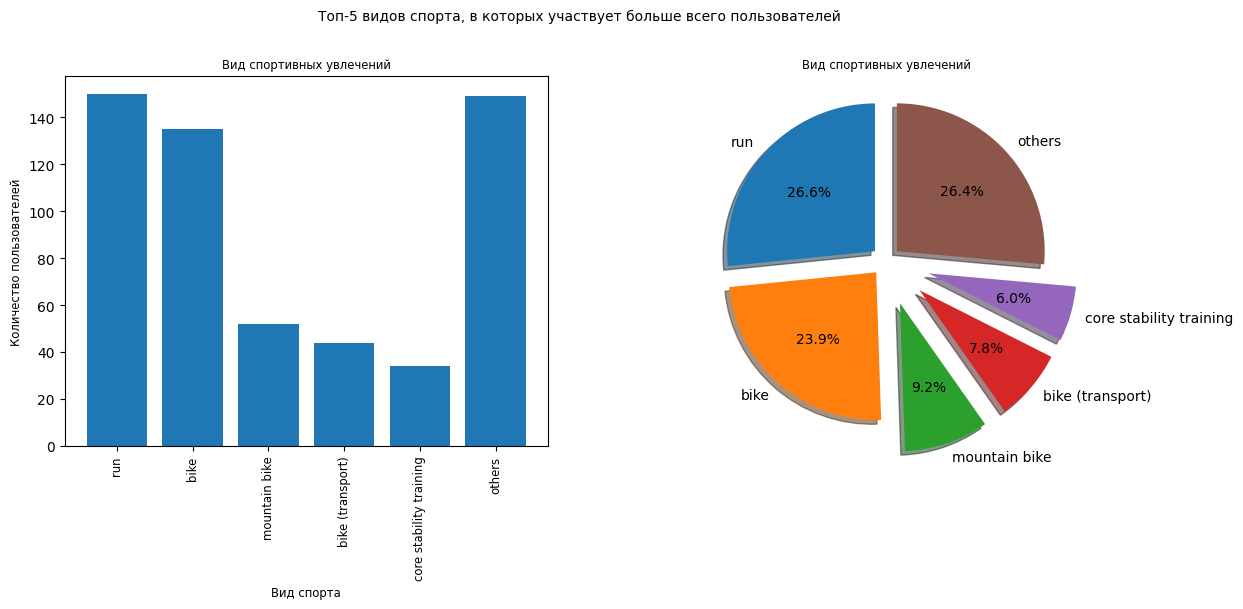

In [36]:
# Получаем топ-5 видов спорта по количеству уникальных пользователей
ranked_sport_users_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

# Топ-5 типов тренировок
highest_sport_users_df = ranked_sport_users_df.limit(5).toPandas()

# Переименование имени столбца: 'count' -> Users count
highest_sport_users_df.rename(columns={'count': 'Users count'}, inplace=True)

# Подсчет общего количества пользователей (для расчета процентов)
total_sports_users = ranked_sport_users_df.groupBy().sum().collect()[0][0]

# Создаем копию DataFrame для дальнейшей работы
highest_sport_users_df_renamed = highest_sport_users_df.copy()

# Calculate the percentage for the top 5 sports
highest_sport_users_df_renamed['percentage'] = highest_sport_users_df_renamed['Users count'] / total_sports_users * 100

# Creating the 'others' group
others = {
    'sport': 'others',
    'Users count': total_sports_users - sum(highest_sport_users_df_renamed['Users count']),
    'percentage': 100 - sum(highest_sport_users_df_renamed['percentage'])
}

# Convert 'others' into a DataFrame
others_df = pd.DataFrame([others])

# Use pd.concat() to append 'others' to the original DataFrame
highest_sport_users_df_renamed = pd.concat([highest_sport_users_df_renamed, others_df], ignore_index=True)

print('Топ-5 видов спорта, в которых участвует больше всего пользователей:')
print(highest_sport_users_df_renamed)

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

# Bar plot
axs[0].bar(x=highest_sport_users_df_renamed['sport'], height=highest_sport_users_df_renamed['Users count'])
axs[0].set_title('Вид спортивных увлечений', fontsize='small')
axs[0].set_xlabel('Вид спорта', fontsize='small')
axs[0].set_ylabel('Количество пользователей', fontsize='small')
axs[0].set_xticklabels(highest_sport_users_df_renamed['sport'], rotation='vertical', fontsize='small')

# Pie chart
explode = (0.1, 0.1, 0.3, 0.3, 0.3, 0.1)
axs[1].pie(
    x=highest_sport_users_df_renamed['percentage'],
    labels=highest_sport_users_df_renamed['sport'],
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=90, radius=1
)
axs[1].set_title('Вид спортивных увлечений', fontsize='small')

# Adding text to the figure
fig.text(0.5, 1.02, 'Топ-5 видов спорта, в которых участвует больше всего пользователей', ha='center', va='top', transform=fig.transFigure)

# Show the plot
plt.show()

Данные показывают, что пользователи тратят наибольшую часть затрат на занятия, связанные с бегом, ходьбой и ездой на велосипеде, что вполне разумно, поскольку эти упражнения удобны без особых вложений 👍

In [37]:
# Просмотр данных в зависимости от пола
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()
activities_by_gender[:5]

sport  gender  count
0                   hiking  female      1
1  core stability training    male    213
2                      run    male  18645
3                 kayaking    male     64
4            mountain bike    male   2345

# **6. UNSTACK PYSPARK DATAFRAME** <a class="anchor" id="5"></a>
[Go back to table of contents](#0.1)

Требуется изменить форму приведенной выше таблицы, чтобы разбить столбец пол, для последующей визуализации.

Определим принцип работы с категориями:

- метод `DataFrame.stack()`: "сводит" уровень (возможно, иерархический) меток столбцов, возвращая a `DataFrame` с новым, самым внутренним уровнем меток строк;

- метод `DataFrame.unstack()`: (обратная операция `DataFrame.stack()`) "сводит" уровень индекса строки (возможно, иерархический) к оси столбца, создавая измененный `DataFrame` с новым, самым внутренним уровнем меток столбцов.

![Spark_vs_Pandas.jpg](https://drive.google.com/uc?export=view&id=1OLmDoS68kKpPLj1bFAPoXKZEjJJcrAeM)

Чтобы изменить форму таблицы в Pyspark, мы используем
```python
df.unstack()
```
Относительно к нашим данным получим следующее разбиение:

![Spark_vs_Pandas.jpg](https://drive.google.com/uc?export=view&id=1lS8DOC-DfsKQOcI0YekPR1lapKpPhXah)



Всего: 30 активности в зависимости от пола:


/tmp/ipython-input-674037566.py:9: FutureWarning: The provided callable <function mean at 0x7cb0bb170220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(


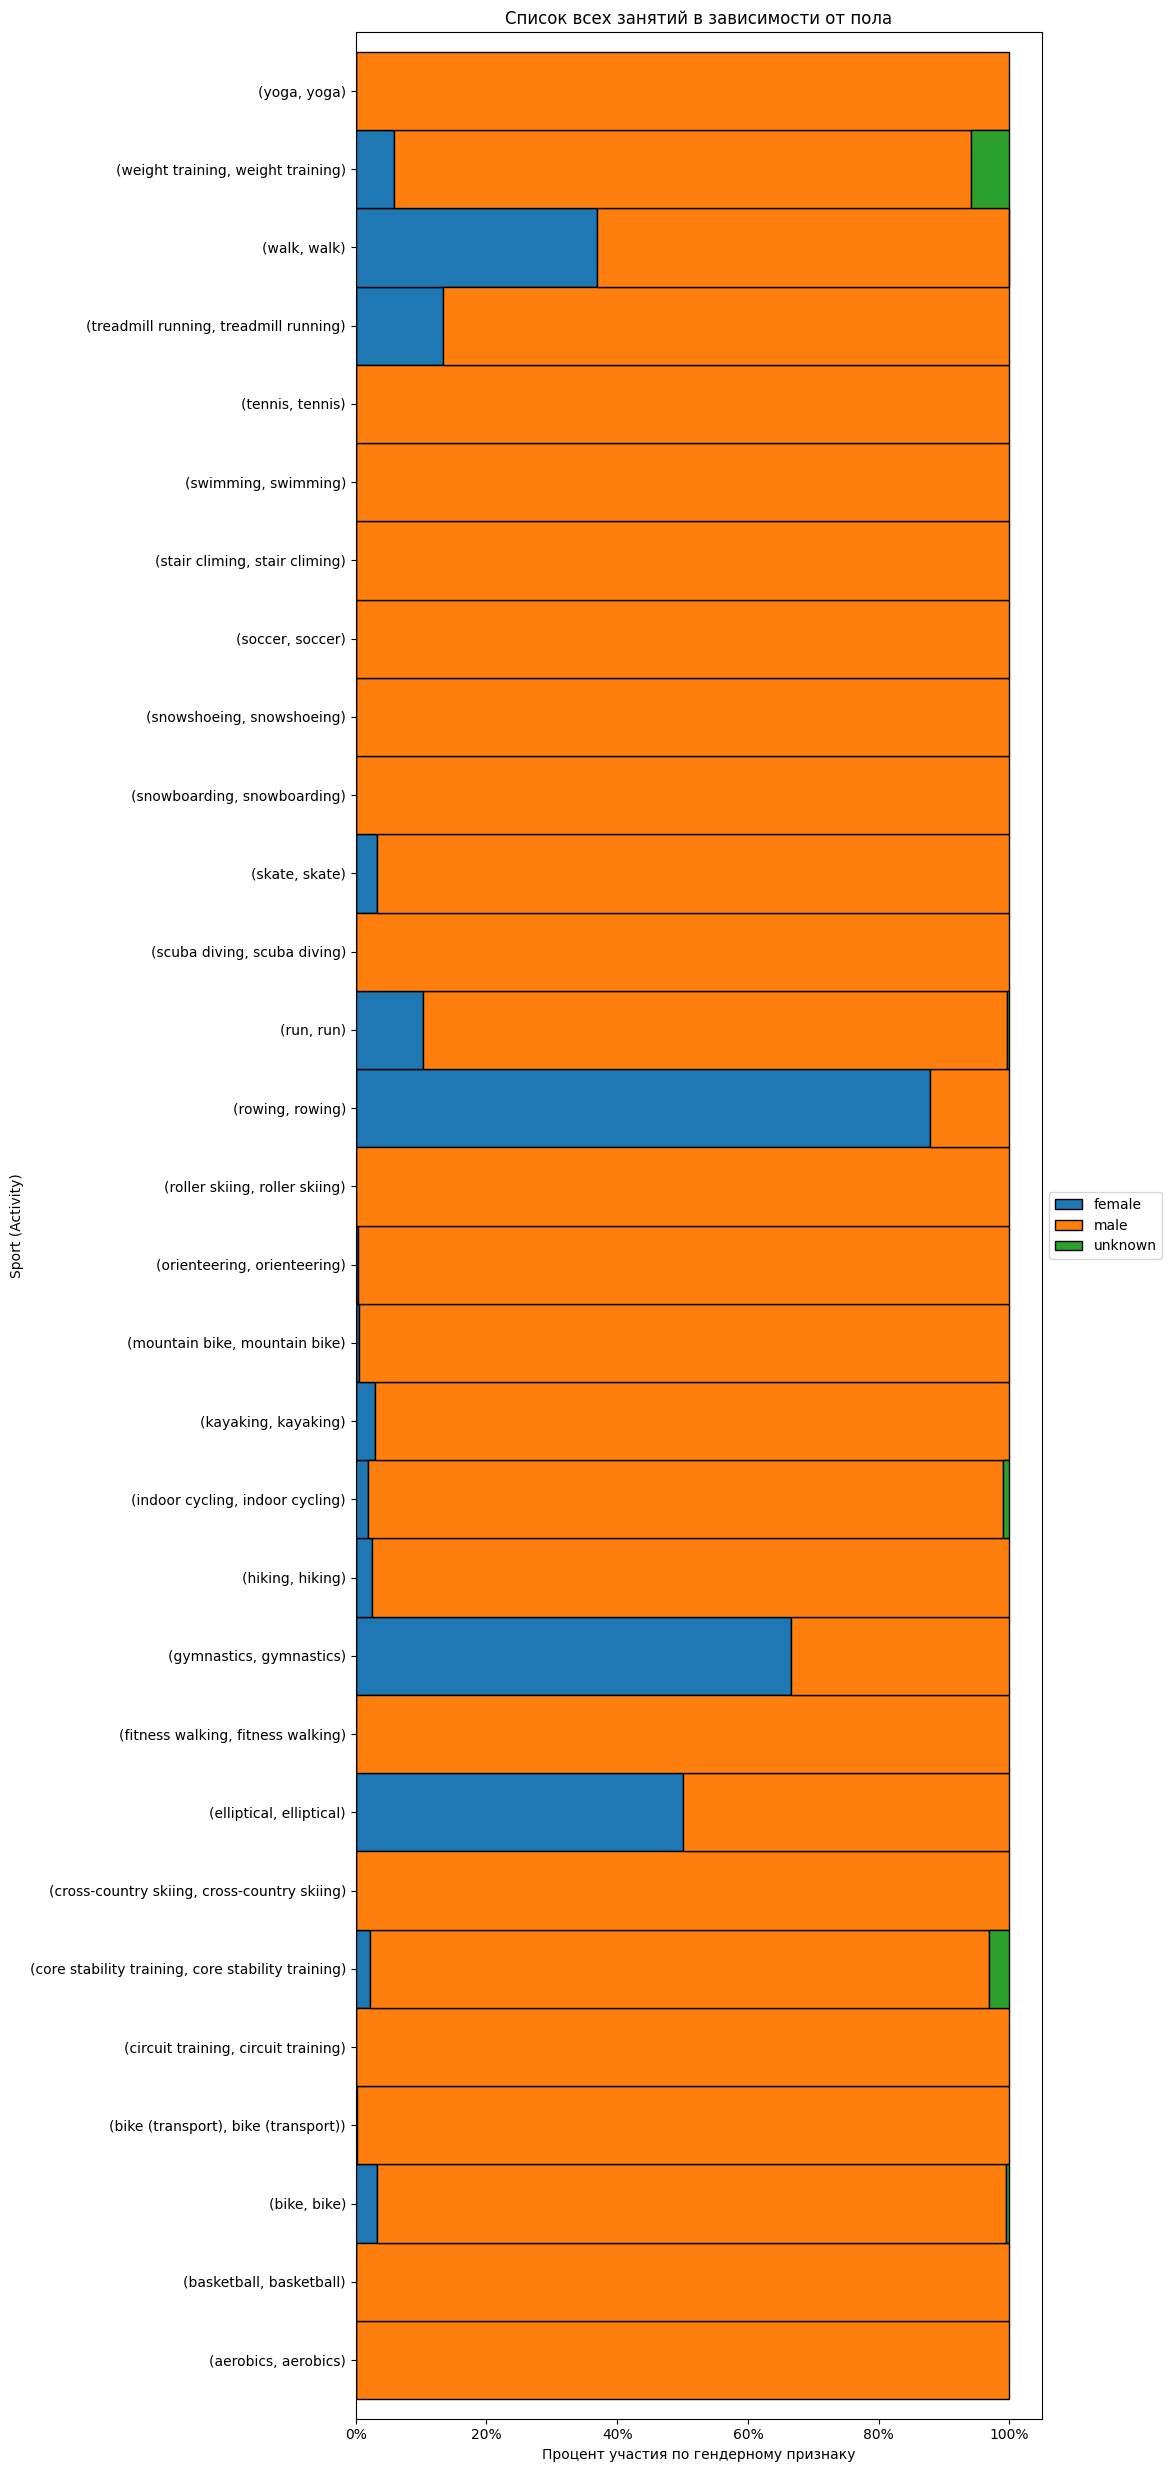

In [38]:
total_activities = ranked_sport_users_df.count()
print(f'Всего: {total_activities} активности в зависимости от пола:')
# Добавление информации о занятиях в зависимости от пола
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()
# Визуализация
fig = plt.figure(figsize=(12, 25))
grid_size = (1,1);
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1  ## APPLY UNSTACK TO RESHAPE DATA
                , edgecolor='black', ax=ax, title='Список всех занятий в зависимости от пола')
ylabel = plt.ylabel('Sport (Activity)');
xlabel = plt.xlabel('Процент участия по гендерному признаку');
legend = plt.legend(
    sorted(activities_by_gender['gender'].unique()), loc='center left', bbox_to_anchor=(1.0, 0.5)
)
param_update = plt.rcParams.update({'font.size': 16});
ax = plt.gca()
formatter = ax.xaxis.set_major_formatter(mtick.PercentFormatter());
a = fig.tight_layout()
plt.show()

Давайте посмотрим на верхнее парето из 5 видов спорта, в которых больше всего участников.

              sport  female     male  unknown    total  percentage
0               run  2169.0  18645.0     90.0  20904.0   49.192827
1              bike   499.0  14364.0     73.0  14936.0   35.148492
2     mountain bike    13.0   2345.0      0.0   2358.0    5.549019
3  bike (transport)     3.0   2298.0      0.0   2301.0    5.414882
5            others    48.0   1124.0      9.0   1181.0    2.779216
4              walk   301.0    512.0      1.0    814.0    1.915565


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Количество тренировок')

Text(0.5, 0, 'Спорт')

Text(0, 0.5, 'Количество тренировок (раз)')

/tmp/ipython-input-1793954635.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_activities_by_gender_df['sport'], rotation='vertical', fontsize='small')


[Text(0, 0, 'run'),
 Text(1, 0, 'bike'),
 Text(2, 0, 'mountain bike'),
 Text(3, 0, 'bike (transport)'),
 Text(4, 0, 'others'),
 Text(5, 0, 'walk')]

([<matplotlib.patches.Wedge at 0x7cb0877e5940>,
 [Text(0.03042638349195526, 1.1996142026450005, 'run'),
  Text(-0.5934319392920214, -1.0429949824558653, 'bike'),
  Text(0.9657683964104895, -1.0135538488381914, 'mountain bike'),
  Text(1.2512906286429144, -0.6279106327101175, 'bike (transport)'),
  Text(1.3699198240665265, -0.288651477788591, 'others'),
  Text(1.3974657417474667, -0.08419917245557076, 'walk')],
 [Text(0.017748723703640567, 0.699774951542917, '49.2%'),
  Text(-0.34616863125367914, -0.6084137397659214, '35.1%'),
  Text(0.6208511119781718, -0.6515703313959802, '5.5%'),
  Text(0.804401118413302, -0.40365683531364693, '5.4%'),
  Text(0.8806627440427668, -0.18556166429266563, '2.8%'),
  Text(0.8983708339805143, -0.05412803943572406, '1.9%')])

Text(0.5, 1.0, 'Соотношение тренировок')

Text(0.5, 1.02, 'Топ-5 видов спорта')

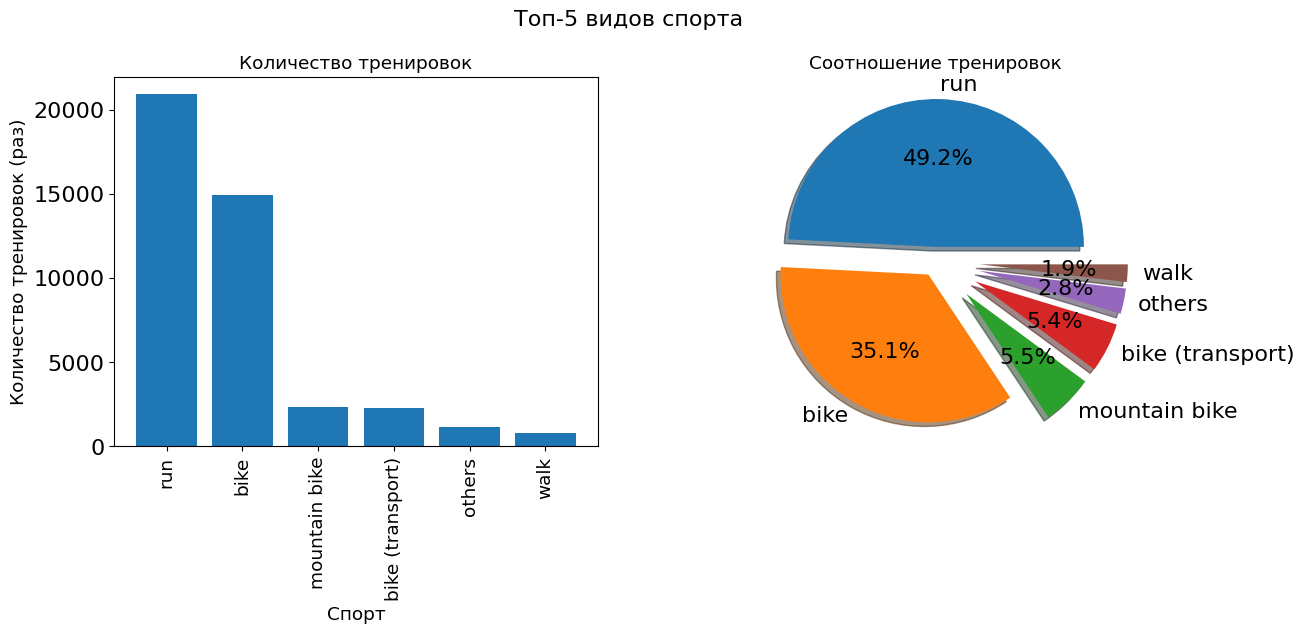

In [39]:
# Pivot the data by gender and sport
activities_by_gender_df = activities_by_gender.pivot_table(
    index="sport", columns="gender", values='count', fill_value=0) \
    .reset_index().rename_axis(None, axis=1)

# Add total count and percentage
activities_by_gender_df['total'] = activities_by_gender_df['male'] + activities_by_gender_df['female'] + activities_by_gender_df['unknown']
activities_by_gender_df['percentage'] = activities_by_gender_df['total'] / sum(activities_by_gender_df['total']) * 100

# Get top 5 activities by percentage
top_activities_by_gender_df = activities_by_gender_df.sort_values(by='percentage', ascending=False).head(5)

# Create the 'others' group
others = {'sport': 'others'}
for column in ['female', 'male', 'unknown', 'total', 'percentage']:
    value = sum(activities_by_gender_df[column]) - sum(top_activities_by_gender_df[column])
    others.update({column: value})

# Convert 'others' to a DataFrame
others_df = pd.DataFrame([others])

# Use pd.concat to add 'others' row to the DataFrame
top_activities_by_gender_df = pd.concat([top_activities_by_gender_df, others_df], ignore_index=True)

# Sort by percentage again
top_activities_by_gender_df = top_activities_by_gender_df.sort_values(by='percentage', ascending=False)

# Display the final DataFrame
print(top_activities_by_gender_df)

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

# Bar plot for total count of activities
axs[0].bar(x=top_activities_by_gender_df['sport'], height=top_activities_by_gender_df['total'])
axs[0].set_title('Количество тренировок', fontsize='small')
axs[0].set_xlabel('Спорт', fontsize='small')
axs[0].set_ylabel('Количество тренировок (раз)', fontsize='small')
axs[0].set_xticklabels(top_activities_by_gender_df['sport'], rotation='vertical', fontsize='small')

# Pie chart for percentage distribution
explode = (0.1, 0.1, 0.3, 0.3, 0.3, 0.3)
axs[1].pie(
    x=top_activities_by_gender_df['percentage'],
    labels=top_activities_by_gender_df['sport'],
    autopct='%1.1f%%', shadow=True, explode=explode, radius=1
)
axs[1].set_title('Соотношение тренировок', fontsize='small')

# Add text to the figure
fig.text(0.5, 1.02, 'Топ-5 видов спорта', ha='center', va='top', transform=fig.transFigure)

# Show the plot
plt.show()

Опять же, как и в случае с участием пользователей, бег, ходьба и поездки на велосипеде также являются основными факторами, для определния  количества тренировок. Однако единственное отличие состоит в том, что количество занятий бегом и ездой на велосипеде намного больше, чем количество остальных видов спорта, и общее количество этих двух видов уже составляет более 85% от общего количества занятий.

Давайте поиграем с каким-нибудь вопросом, например, сколько людей участвовало более чем в одном виде спорта.



> Интерпретируйте результаты анализа пользователей, занимающихся более чем одним видом спорта (user_more_sports_df, раздел 6). Какой процент пользователей занимается более чем одним видом спорта (оценочно)?



In [41]:
min_number_of_sports = 1

sport_df = df \
    .select(df.userId, df.gender, df.sport) \
    .distinct() \
    .groupBy(df.userId, df.gender) \
    .count()

user_more_sports_df = sport_df \
    .filter(sport_df["count"] > min_number_of_sports) \
    .orderBy("count", ascending=False)

# Преобразуем в Pandas для анализа
user_more_sports_pd = user_more_sports_df.toPandas()
user_more_sports_pd.rename(columns={'count': 'Sports count'}, inplace=True)

# Подсчет процента пользователей с более чем одним видом спорта
total_users = df.select('userId').distinct().count()
users_more_than_one_sport = user_more_sports_df.count()

percentage_more_sports = (users_more_than_one_sport / total_users) * 100

print(f"Общее количество пользователей: {total_users}")
print(f"Пользователей с более чем одним видом спорта: {users_more_than_one_sport}")
print(f"Процент пользователей с более чем одним видом спорта: {percentage_more_sports:.2f}%")

Общее количество пользователей: 189
Пользователей с более чем одним видом спорта: 143
Процент пользователей с более чем одним видом спорта: 75.66%


*1. Оценочный процент пользователей, занимающихся более чем одним видом спорта: {percentage_more_sports:.2f}%*

*2. Это показывает, что большинство пользователей специализируются на одном виде спорта*

*3. Многоспортивные пользователи могут быть более активными или разнообразными в тренировках*

*4. Статистика по полу показывает схожее распределение между мужчинами и женщинами* <br />
Теперь посмотрим на статистику по полу на коробчатой диаграмме:


<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'Sports count'}, xlabel='gender'>

Text(0.5, 1.0, 'Количество видов спорта по полу')

Text(0.5, 0.98, '')

<Figure size 1000x600 with 0 Axes>

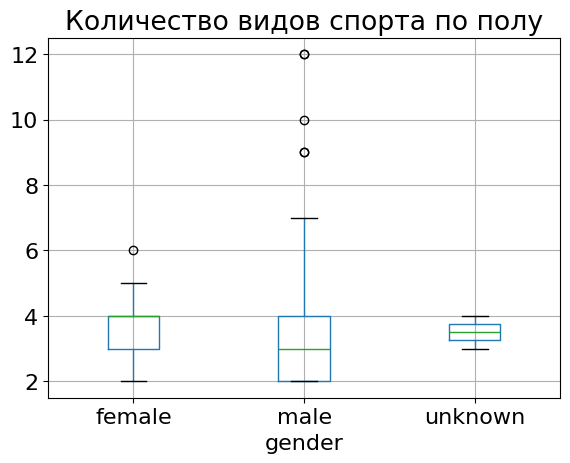

In [43]:
plt.figure(figsize=(10, 6))
user_more_sports_pd.boxplot(column='Sports count', by='gender')
plt.title('Количество видов спорта по полу')
plt.suptitle('')
plt.show()

Типичное поведение: Большинство пользователей занимаются 1-4 видами спорта

Медианные значения: Около 2 видов спорта для всех групп

Различия в разбросе: Женщины имеют немного больший разброс данных (более широкий ящик)

Активные пользователи: Есть отдельные пользователи, которые занимаются 10+ видами спорта (выбросы)

### Распределение количества рекордов за тренировку

*Для более детального наблюдения мы разбили количество рекордов по каждому виду деятельности по каждому отдельному виду спорта. <br />Исходя из распределения, максимальное количество записей за тренировку составляет 500, но не все тренировки и виды спорта достигают этого числа.*


График распределения тренировок по видам деятельности:


/tmp/ipython-input-3230289990.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  PerWorkoutRecordCount_dist = df.select('PerWorkoutRecordCount', 'sport').toPandas().hist(


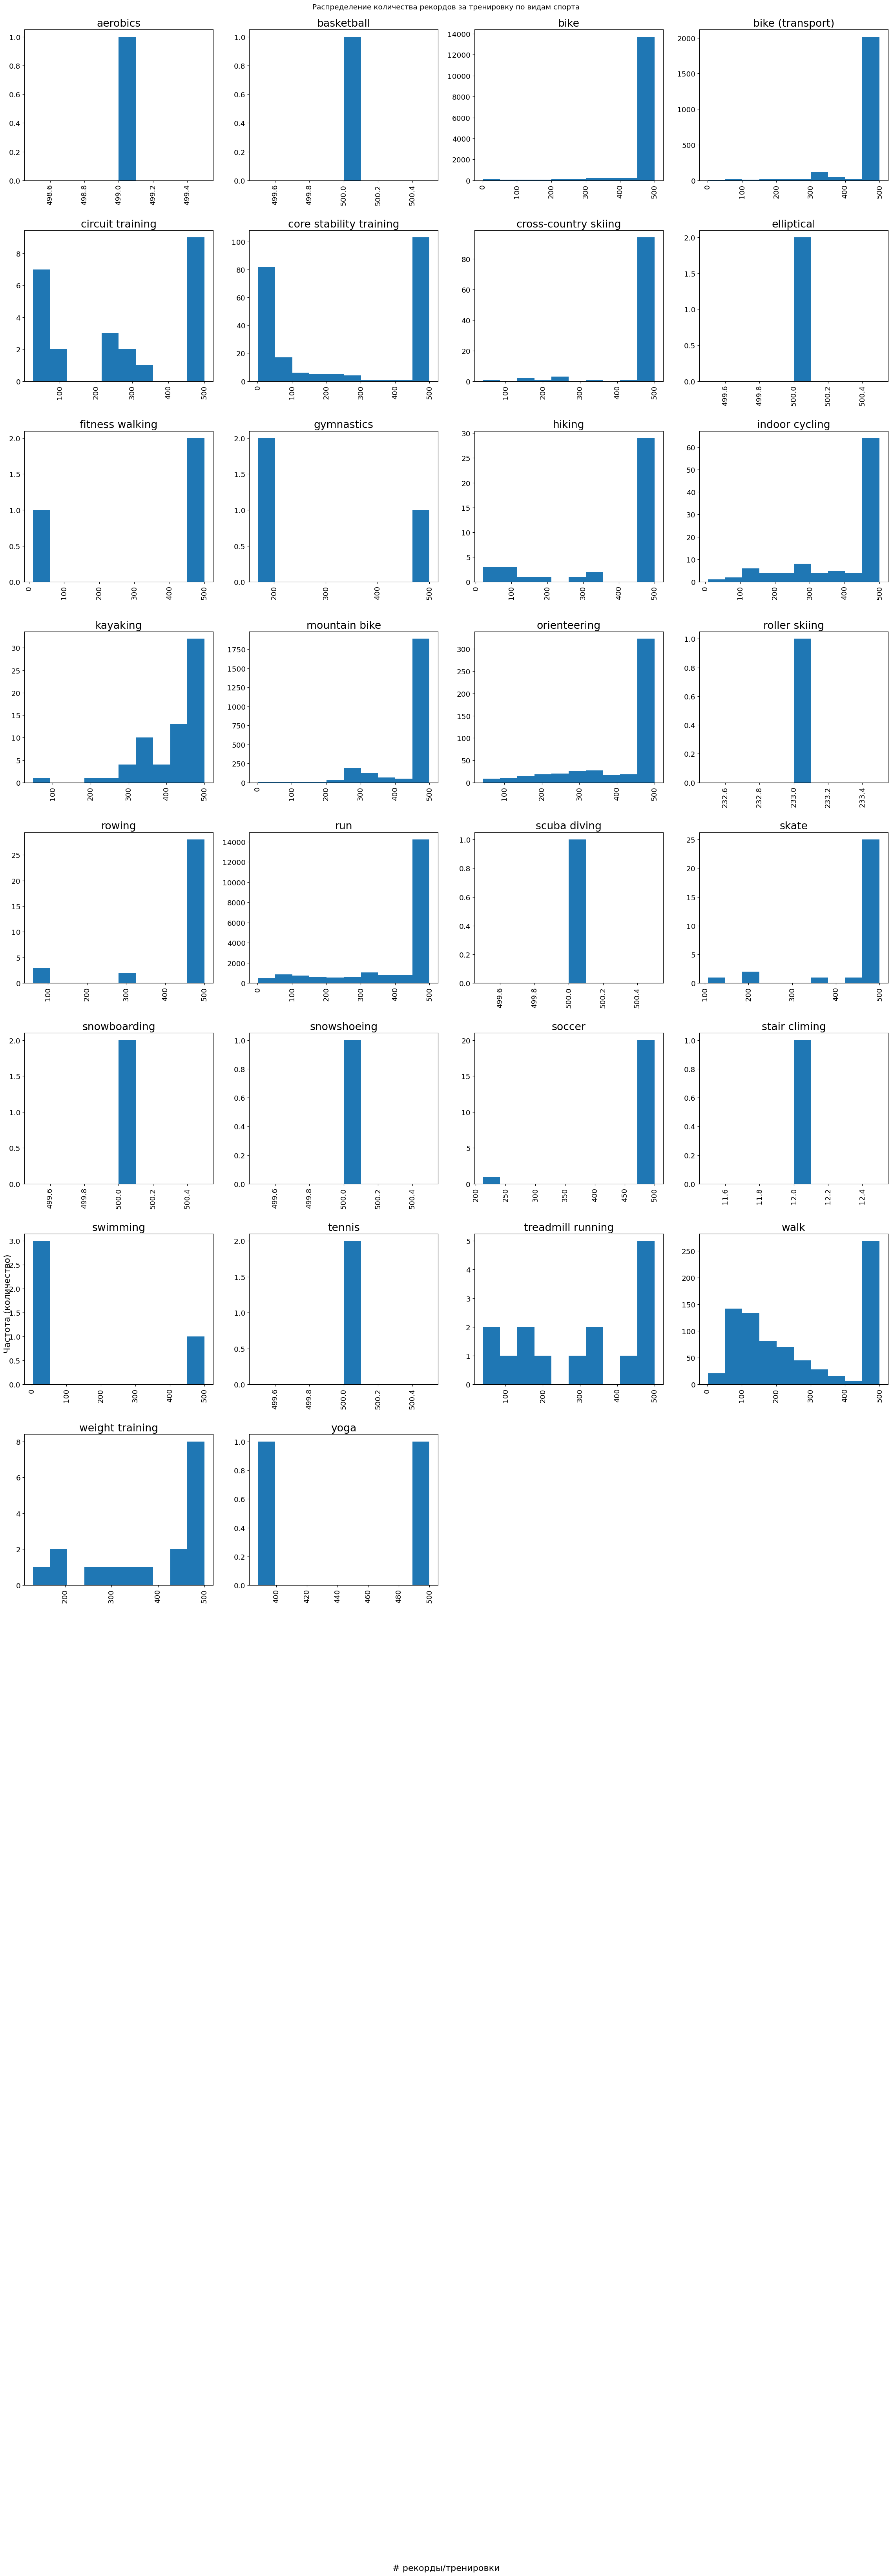

In [44]:
print('\nГрафик распределения тренировок по видам деятельности:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 + 3, plot_size_y * 13 + 1
figsize=(figsize_x, figsize_y)
fig = plt.figure(figsize=figsize) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
#fig, ax = plt.subplots()
PerWorkoutRecordCount_dist = df.select('PerWorkoutRecordCount', 'sport').toPandas().hist(
    column='PerWorkoutRecordCount', bins=10, sharex = False, grid=True
    , xlabelsize='small', ylabelsize='small', by='sport', ax = ax
    , layout = grid_size, figsize=figsize
    )
a = fig.tight_layout()
title = fig.text(0.5, 1, 'Распределение количества рекордов за тренировку по видам спорта', ha='center'
         , fontsize='small', transform=fig.transFigure);
xlabel = fig.text(
    0.5, 0.01, '# рекорды/тренировки', va='bottom', ha='center', transform=fig.transFigure
)
ylabel = fig.text(0.01, 0.5, 'Частота (количество)', va='center', rotation='vertical');

In [45]:
# Отфильтровать df с минимум 10 записями (поскольку мы предполагаем, что любой user_id с записью менее 10 не будет иметь смысла)
qualified_df = df \
    .select(df.sport, df.userId, df.gender) \
    .groupBy(df.sport, df.userId, df.gender) \
    .count()
qualified_df = qualified_df.filter(qualified_df["count"] >= 10) \
    .orderBy("count", ascending = False)

In [46]:
print('Количество пользователей, имеющих более 10 тренировок:')
qualified_pd_df = qualified_df.select("userId", "gender").distinct() \
    .groupBy(qualified_df.gender).count().toPandas()
qualified_pd_df.rename(columns={'count': 'Users count'}, inplace=True)
qualified_pd_df
qualified_users_count = sum(qualified_pd_df['Users count'])
total_users_count = df.select('userId').distinct().count()
qualified_percentage = round((qualified_users_count / total_users_count),2) * 100
print('\nТаким образом, есть {} / {} пользователей, соответствующих 10 критериям исторических записей, что {:.2f}%' \
      .format(qualified_users_count, total_users_count, qualified_percentage)
     )

Количество пользователей, имеющих более 10 тренировок:


gender  Users count
0  unknown            3
1   female           15
2     male          157


Таким образом, есть 175 / 189 пользователей, соответствующих 10 критериям исторических записей, что 93.00%


# **7. Pyspark UDF** <a class="anchor" id="6"></a>
[Go back to table of contents](#0.1)

Что такое `UDF`?

`User Defined Functions` - это пользовательские функции. Если  знакомы с `SQL`, `UDF` не являются для вас чем-то новым, поскольку большинство традиционных баз данных РСУБД поддерживают пользовательские функции, эти функции необходимо зарегистрировать в библиотеке базы данных и использовать их в `SQL` как обычные функции.

`UDF PySpark` аналогичны `UDF` в традиционных базах данных. В `PySpark` создается функция в синтаксисе `Python` и обертываете ее `PySpark SQL udf()` или регистрируете ее как `udf` и используете ее в `DataFrame` и `SQL` соответственно.

Зачем нужна `UDF`?

`UDF` используются для расширения функций платформы и повторного использования этих функций в нескольких `DataFrame`. Например, требуется преобразовать каждую первую букву слова в строке имени в заглавную; Встроенные функции `PySpark` не имеют этой функции, поэтому можно создать `UDF` и повторно использовать ее по мере необходимости во многих кадрах данных. После создания `UDF` их можно повторно использовать в нескольких выражениях `DataFrame` и `SQL`.

Прежде чем создавать какую-либо пользовательскую функцию, изучите, доступна ли аналогичная функция, которая вам нужна, в `Spark SQL Functions` . `PySpark SQL` предоставляет несколько предопределенных общих функций, и с каждым выпуском добавляется множество новых функций, следовательно, лучше всего проверить, прежде чем изобретать велосипед.

При создании `UDF`  необходимо проектировать их очень тщательно, иначе столкнетесь с проблемами оптимизации и производительности.

Короче говоря, регистрация UDF в Pyspark — это процесс **превращения функций Python в функции PySpark (UDF)**.

![Spark_vs_Pandas.jpg](https://drive.google.com/uc?export=view&id=1x5s0p9oa-dNIsNo5XzYQjdMQUxt99WYP)

Когда запускаем код в кластерах `Spark`, этот метод ускорит процесс и сэкономит время выполнения.

Чтобы узнать больше о `Pyspark UDF`, посетите https://changhsinlee.com/pyspark-udf/.

Выполним регистрацию функции Python к UDF в столбце `timestamp`.


Этот столбец очень важен, если используем этот набор данных для прогнозирования, например, для прогнозирования частоты пульса, чтобы определить возможные проблемы с сердцем у пользователя фитнес-трекера.

### Создание некоторых новых функций из `timestamp`

Столбец `timestamp` содержит записи серий временных меток одной тренировки (строка данных) и хранится в формате временных меток `UNIX`. Чтобы получить больше информации об этом столбце,  создадим из него `4` новых столбца:
- `date_time`: конвертировать временную метку `UNIX` в формат даты и времени Python.
- `duration`: общее время одной тренировки в минутах.
   *Чтобы получить «продолжительность» тренировки, получаем разницу между максимальным и минимальным значением списка даты и времени каждой тренировки.*
- `workout_start_time`: определим, когда и в какой час дня начинается тренировка.
   *Для «workout_start_time» это первая часть записи даты и времени тренировки.*
- `interval`: список промежутков времени между каждой отдельной записью временной метки в одной тренировке, в секундах.
   *Что касается интервала, рассчитаем его, взяв разницу между двумя последовательными записями временных меток в течение тренировки.*

Чтобы прикрепить эти 4 функции к `SparkdDataFrame`,  регистрируем их с помощью `PYSPARK UDF`.

```python
function_to_udf = udf(function, Datatype())

# Datatype() can be floattype(), TimestampType(), etc

```


In [47]:
# ПОСМОТРИТЕ СНОВА КОЛОНКУ ВРЕМЕННОЙ МЕТКИ
df.limit(3).toPandas()

altitude gender  \
0  [41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....   male   
1  [38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....   male   
2  [76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....   male   

                                          heart_rate         id  \
0  [100, 111, 120, 119, 120, 116, 125, 128, 131, ...  396826535   
1  [100, 105, 111, 110, 108, 115, 126, 130, 132, ...  392337038   
2  [99, 105, 113, 110, 109, 110, 108, 121, 116, 1...  389643739   

                                            latitude  \
0  [60.173348765820265, 60.173239801079035, 60.17...   
1  [60.173247596248984, 60.17320962622762, 60.172...   
2  [60.17326201312244, 60.173205351457, 60.172969...   

                                           longitude  \
0  [24.64977040886879, 24.65014273300767, 24.6509...   
1  [24.649855233728886, 24.65015547350049, 24.650...   
2  [24.64995657093823, 24.650197718292475, 24.651...   

                                               speed sport  \
0  [6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...  bike   
1  [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...  bike   
2  [4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...  bike   

                                           timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   
2  [1407858459, 1407858466, 1407858478, 140785849...   

                                                 url    userId  \
0  https://www.endomondo.com/users/10921915/worko...  10921915   
1  https://www.endomondo.com/users/10921915/worko...  10921915   
2  https://www.endomondo.com/users/10921915/worko...  10921915   

   PerWorkoutRecordCount  
0                    500  
1                    500  
2                    500

### ### Мы создаем 4 вспомогательные функции для столбца 'timestamp', как описано выше, а затем преобразуем их в UDF.

In [48]:
# Преобразование столбца метки времени в Datetime.Datetime, чтобы позже использовать его для функции .withColumn.
def to_time(timestamp_list):
    # преобразовать в дату и время и минус 7 часов из-за разницы во временном окне Endomondo с временем utc в качестве описания набора данных
    return [datetime.fromtimestamp(t) - timedelta(hours=7) for t in timestamp_list]

# Регистрация вспомогательной функции to_time в структуре UDF pyspark
udf_to_time = udf(to_time, ArrayType(elementType=TimestampType()))

# Вспомогательная функция для получения продолжительности (в минутах) списка значений даты и времени, которая будет позже использована для функции withColumn.
def get_duration(datetime_list):
    time_dif = max(datetime_list) - min(datetime_list)
    return time_dif.seconds/60

# Регистрация вспомогательной функции get_duration как пользовательской функции в pyspark.
udf_get_duration = udf(get_duration, FloatType())

# Вспомогательная функция для получения времени начала тренировки из списка даты и времени, которая будет позже использована для функции withColumn.
def get_start_time(datetime_list):
    return min(datetime_list)

# Регистрация вспомогательной функции get_start_time как пользовательской функции в pyspark
udf_get_start_time = udf(get_start_time, TimestampType())

# Вспомогательная функция для получения списка интервалов во время тренировки
def get_interval(datetime_list):
    if len(datetime_list) == 1:
        return [0]
    else:
        interval_list = []
        for i in range(0, len(datetime_list)-1):
            interval = (datetime_list[i+1] - datetime_list[i]).seconds
            interval_list.append(interval)
        return interval_list

# Регистрация вспомогательной функции get_interval как пользовательской функции в pyspark.
udf_get_interval = udf(get_interval, ArrayType(elementType=IntegerType()))

# Создание нового столбца date_time для преобразования метки времени в формат даты и времени Python для последующего использования.
df = df.withColumn('date_time',
    udf_to_time('timestamp'))

# Создание столбца «workout_start_time», чтобы получить время начала каждой тренировки/строки:
df = df.withColumn('workout_start_time', hour(udf_get_start_time('date_time')))

# Создание столбца продолжительности из только что созданного столбца date_time, используя функцию udf udf_get_duration, определенную выше.
df = df.withColumn('duration', udf_get_duration('date_time'))

# Создание столбца интервала из столбца date_time, используя функцию udf udf_get_interval, определенную выше.
df = df.withColumn('interval', udf_get_interval('date_time'))

print('Новые столбцы (''date_time'', ''workout_start_time'' in hour\
, ''duration'' in minutes & ''interval'' in seconds)\n, first 5 rows:')
df.select('timestamp','date_time', 'workout_start_time', 'duration', 'interval').limit(5).toPandas()



Новые столбцы (date_time, workout_start_time in hour, duration in minutes & interval in seconds)
, first 5 rows:


timestamp  \
0  [1408898746, 1408898754, 1408898765, 140889877...   
1  [1408221682, 1408221687, 1408221699, 140822170...   
2  [1407858459, 1407858466, 1407858478, 140785849...   
3  [1407432042, 1407432048, 1407432056, 140743206...   
4  [1406909434, 1406909436, 1406909437, 140690943...   

                                           date_time  workout_start_time  \
0  [2014-08-24 09:45:46, 2014-08-24 09:45:54, 201...                   9   
1  [2014-08-16 13:41:22, 2014-08-16 13:41:27, 201...                  13   
2  [2014-08-12 08:47:39, 2014-08-12 08:47:46, 201...                   8   
3  [2014-08-07 10:20:42, 2014-08-07 10:20:48, 201...                  10   
4  [2014-08-01 09:10:34, 2014-08-01 09:10:36, 201...                   9   

     duration                                           interval  
0  126.483330  [8, 11, 13, 16, 6, 23, 16, 23, 29, 23, 24, 24,...  
1   74.000000  [5, 12, 8, 4, 5, 6, 4, 4, 5, 13, 7, 17, 4, 10,...  
2  112.483330  [7, 12, 12, 16, 6, 7, 16, 11, 19, 13, 17, 11, ...  
3   75.316666  [6, 8, 9, 4, 13, 4, 3, 4, 13, 10, 13, 13, 7, 1...  
4   22.616667  [2, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 2, 4, 4, ...

### Теперь посмотрим на продолжительность каждой тренировки (в минутах).

In [49]:
print('\nСтатистика длительности (в минутах):')
df.select('duration').toPandas().describe().T


Статистика длительности (в минутах):


count       mean       std  min        25%        50%        75%  \
duration  42494.0  78.228294  87.49398  0.0  31.870833  54.200001  93.429167   

                  max  
duration  1404.949951

Из статистики столбца `duration` видно, что продолжительность тренировки может длиться от 0 минут до 1 полного дня (1440 минут = 24 часа). Продолжительность 0 может быть для тренировок, которые имеют только одну запись, поэтому минимальная и максимальная отметки времени будут одинаковыми.<br />
Теперь пришло время построения графика продолжительности:



Построение графика распределения продолжительности по видам спорта:


/tmp/ipython-input-1230165354.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  duration_dist = df.select('duration', 'sport').toPandas().hist(


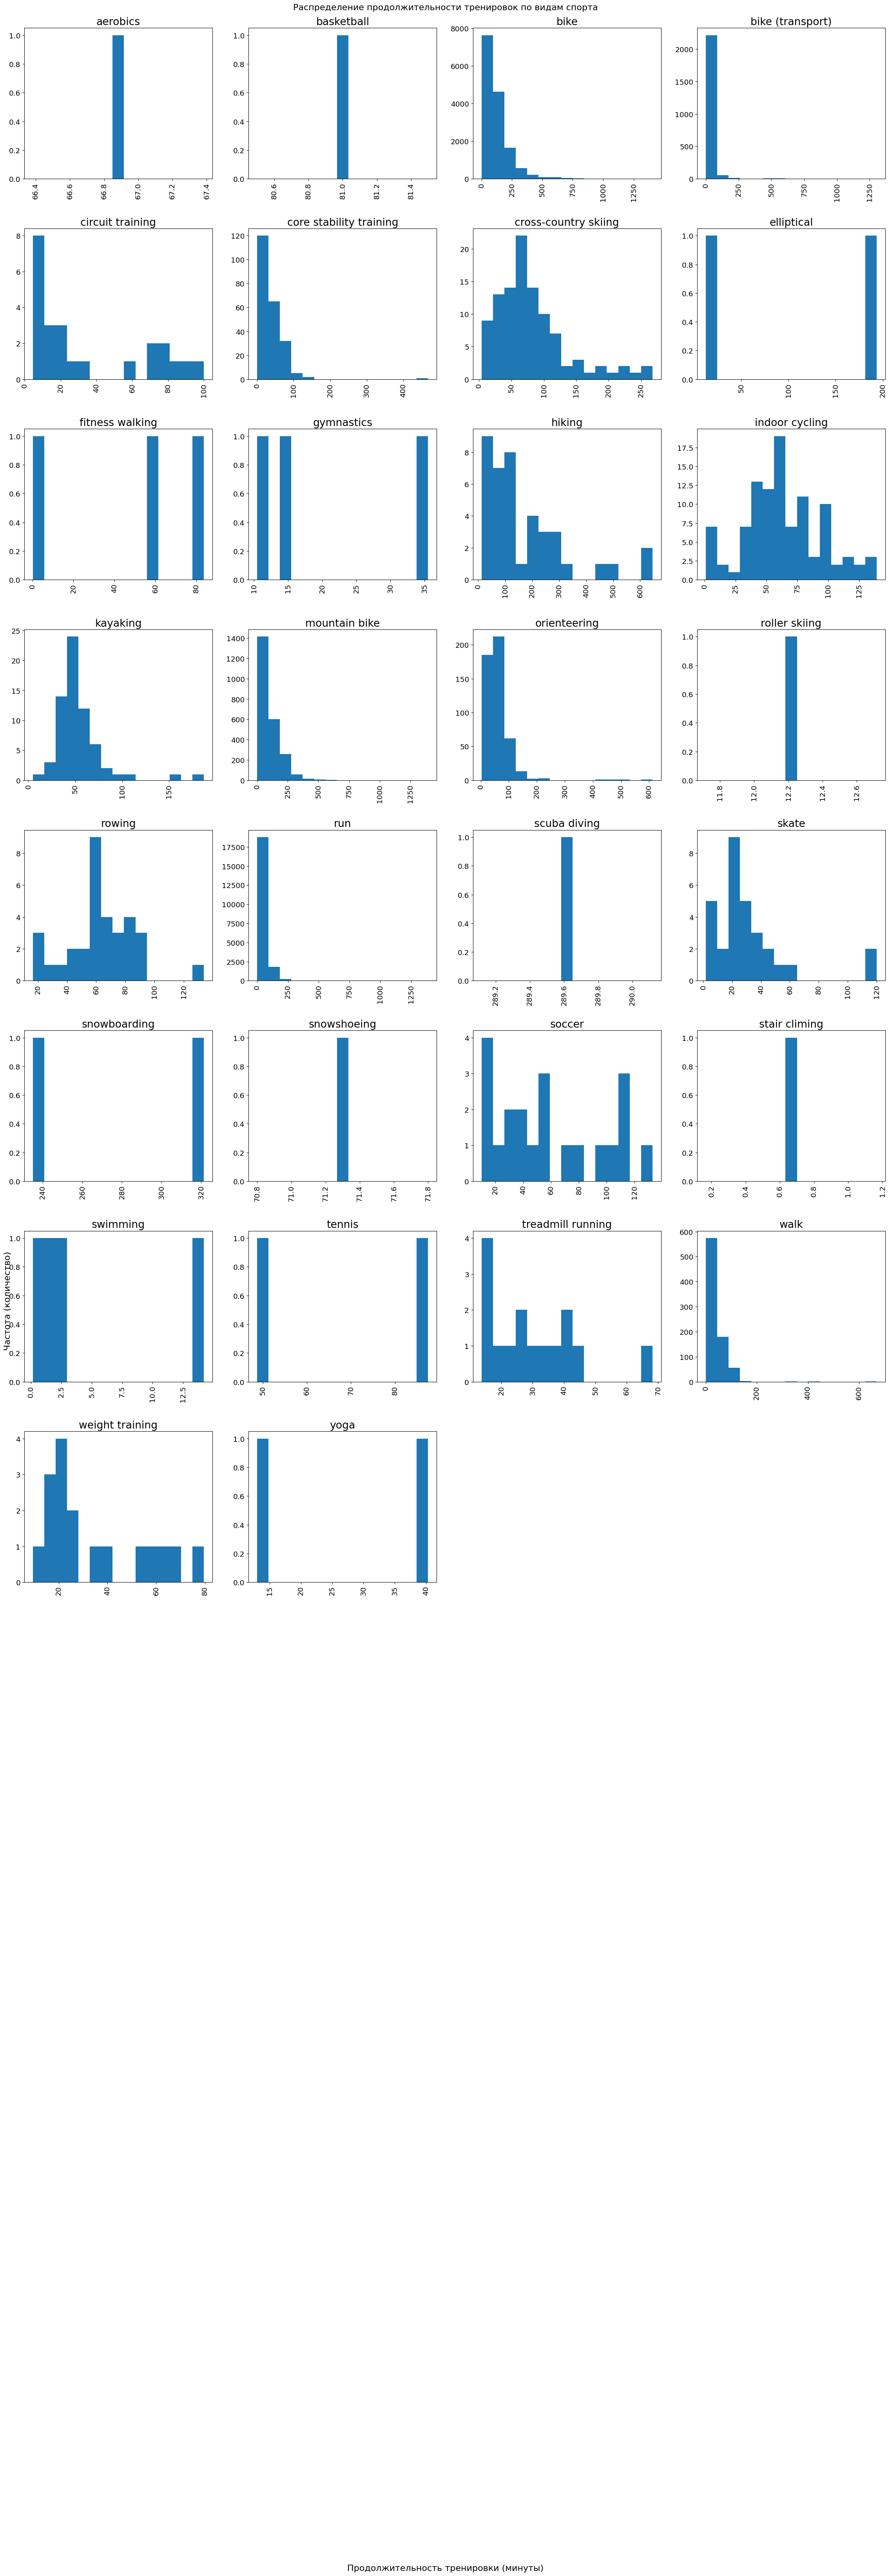

In [50]:

print('\nПостроение графика распределения продолжительности по видам спорта:')
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 +3, plot_size_y * 13 + 1
figsize = (figsize_x, figsize_y)
fig = plt.figure(figsize=figsize) #
grid_size = (13,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)

duration_dist = df.select('duration', 'sport').toPandas().hist(
    column='duration', by='sport', bins=15, sharex = False, grid=True
    , xlabelsize='small', ylabelsize='small' , ax = ax
    , layout = grid_size, figsize=figsize
    )
a = fig.tight_layout()
title = fig.text(0.5, 1, 'Распределение продолжительности тренировок по видам спорта'
             , ha='center', va='center', transform=fig.transFigure
            )
xlabel = fig.text(0.5, 0.01, 'Продолжительность тренировки (минуты)'
             , ha='center', va='center', transform=fig.transFigure)
ylabel = fig.text(0.01, 0.5, 'Частота (количество)', va='center', rotation='vertical');

* Судя по сводке продолжительности и графику распределения, большинство занятий происходит в течение 1–2 часов, только несколько видов спорта и несколько случаев каждого типа происходят в течение более длительных периодов, таких как поездка на горном велосипеде, пеший туризм, парусный спорт и т. д. *

# **8.Преобразование объектов строк в устойчивый распределенный набор данных Spark (RDD)** <a class="anchor" id="7"></a>
[Go back to table of contents](#0.1)

На этом графике мы попрактикуемся в преобразовании объекта строки в формат RDD в Pyspark с помощью:

```python
rdd = df.rdd.map(tuple)
or
rdd = df.rdd.map(list)
```
Расширенный формат RDD: каждый набор данных разделен на логические части, которые можно легко вычислить на разных узлах кластера. Они могут работать параллельно и являются отказоустойчивыми, поэтому процесс является стабильным и очень быстрым.

Если мы запустим этот код, например, на Zeppelin, который интегрирован с кластерами Pyspark, мы увидим, какова скорость `RDD Spark`.

`RDD` — очень важная концепция в `Spark`, можете углубиться в нее здесь:
https://www.educba.com/what-is-rdd/

Чтобы попрактиковаться в этой концепции,  посмотрим на столбец `interval` и получим по нему некоторую статистику. Рассчитаем некоторые основные статистические данные (мин/макс/среднее/среднее/стандартное отклонение и 4 квантиля 25/50/75/95) в `pySpark`, преобразуем в Rdd и построим их на графике.



In [51]:
# Вспомогательная функция для расчета статистики имени столбца из кортежа x (спорт, список записей столбца) tuple x of (sport, records list of the column)
#, статистика для расчета также предоставляется в качестве входных данных
def calculate_stats(x,column_name, stat_list):
    sport, records_list = x
    stat_dict = {'sport': sport}
    if 'min' in stat_list:
        min_stat = min(records_list)
        stat_dict.update({'min ' + column_name : min_stat})
    if 'max' in stat_list:
        max_stat = max(records_list)
        stat_dict.update({'max ' + column_name: max_stat})
    if 'mean' in stat_list:
        average_stat = stats.mean(records_list)
        stat_dict.update({'mean ' + column_name: average_stat})
    if 'stdev' in stat_list:
        std_stat = stats.stdev(records_list)
        stat_dict.update({'stdev ' + column_name: std_stat})
    if '50th percentile' in stat_list:
        median_stat = stats.median(records_list)
        stat_dict.update({'50th percentile ' + column_name: median_stat})
    if '25th percentile' in stat_list:
        percentile_25th_stat = np.percentile(records_list, 25)
        stat_dict.update({'25th percentile ' + column_name: percentile_25th_stat})
    if '75th percentile' in stat_list:
        percentile_75th_stat = np.percentile(records_list, 75)
        stat_dict.update({'75th percentile ' + column_name: percentile_75th_stat})
    if '95th percentile' in stat_list:
        percentile_95th_stat = np.percentile(records_list, 95)
        stat_dict.update({'95th percentile ' + column_name: percentile_95th_stat})
    return stat_dict

def to_list(a):
    return a

def extend(a, b):
    a.extend(b)
    return a

def retrieve_array_column_stat_df(df, column_name, stat_list):
    # Преобразование спорт и «column_name» в RDD, чтобы легко рассчитать статистику интервалов по видам спорта.
    sport_record_rdd = df.select('sport', column_name).rdd \
    .map(tuple).combineByKey(to_list, extend, extend).persist()

    # Вычислить статистику входного столбца, вызвав функцию Calcul_stats, определенную выше.
    record_statistic_df = pd.DataFrame(sport_record_rdd.map(
        lambda x: calculate_stats(x, column_name,stat_list)).collect()
                                      )
    # Установка правильного порядка столбцов данных.
    columns_order = ['sport'] + [stat + ' ' + column_name for stat in stat_list]
    # Изменение порядка столбцов
    return record_statistic_df[columns_order]

stat_list = ['min', '25th percentile', 'mean', '50th percentile',
                     '75th percentile', '95th percentile', 'max', 'stdev']
interval_statistic_df = retrieve_array_column_stat_df(df, column_name='interval', stat_list=stat_list)
print('\nПросмотр статистики интервалов в секундах (по виду спорта)' )
interval_statistic_df


Просмотр статистики интервалов в секундах (по виду спорта)


sport  min interval  25th percentile interval  \
0          circuit training             0                       2.0   
1                gymnastics             1                       2.0   
2             roller skiing             1                       2.0   
3          bike (transport)             0                       4.0   
4      cross-country skiing             0                       5.0   
5                      bike             0                       5.0   
6                       run             0                       4.0   
7                    hiking             0                       8.0   
8   core stability training             0                       4.0   
9                  swimming             1                       1.0   
10             scuba diving            10                      21.0   
11             snowboarding            15                      21.0   
12                 aerobics             8                       8.0   
13             orienteering             0                       4.0   
14                     walk             0                       3.0   
15          fitness walking             0                       6.0   
16              snowshoeing             4                       5.0   
17                     yoga             1                       1.0   
18            mountain bike             0                       4.0   
19               elliptical             1                       1.0   
20               basketball             9                       9.0   
21                 kayaking             0                       6.0   
22           indoor cycling             0                       5.0   
23        treadmill running             0                       3.0   
24                   rowing             0                       5.0   
25                   tennis             5                       6.0   
26                    skate             0                       2.0   
27          weight training             0                       2.0   
28            stair climing             1                       2.5   
29                   soccer             1                       3.0   

    mean interval  50th percentile interval  75th percentile interval  \
0        7.561031                       5.0                       9.0   
1        4.286738                       4.0                       6.0   
2        3.159483                       3.0                       4.0   
3        6.198274                       5.0                       6.0   
4       10.267517                       8.0                      13.0   
5       15.622029                      10.0                      17.0   
6        7.592856                       6.0                       9.0   
7       25.462206                      15.0                      26.0   
8        7.613085                       6.0                       8.0   
9        2.064220                       2.0                       2.0   
10      34.823647                      33.0                      43.0   
11      33.447896                      22.0                      23.0   
12       8.058233                       8.0                       8.0   
13       8.311091                       7.0                      10.0   
14       7.726936                       6.0                       9.0   
15       8.379960                       7.0                      10.0   
16       8.573146                       7.0                      11.0   
17       3.611738                       2.0                       4.0   
18      12.798237                       8.0                      15.0   
19      12.390782                       3.0                      18.0   
20       9.739479                      10.0                      10.0   
21       7.630555                       7.0                       8.0   
22       9.373164                       7.0                      11.0   
23       5.788674                       4.0                       7.

Теперь мы отображаем эти числа в виде столбцов (для статистики квантилей) и линейных диаграмм (для мин/макс/среднего/стандартного отклонения) для большей наглядности.
*Примечание. Поскольку максимальный интервал и стандартное отклонение имеют гораздо более высокий порядок величины по сравнению с остальными столбцами, нам нужно поместить эти два столбца на отдельную ось Y справа.*


Обобщенная статистика интервальных видов спорта:


Text(0.5, 1.0, 'Интервальная статистика по видам спорта (группа 1)')

Text(0.5, 0, 'Спорт (Активность)')

Text(0, 0.5, 'Статистика квантилей + мин/среднее (секунд)')

Text(0, 0.5, 'Max/stdev Statistics (секунд)')

[Text(0, 0, 'scuba diving'),
 Text(1, 0, 'hiking'),
 Text(2, 0, 'snowboarding'),
 Text(3, 0, 'elliptical'),
 Text(4, 0, 'bike'),
 Text(5, 0, 'mountain bike'),
 Text(6, 0, 'cross-country skiing')]

Text(0.5, 1.0, 'Интервальная статистика по видам спорта (группа 2)')

Text(0.5, 0, 'Спорт (Активность)')

Text(0, 0.5, 'Статистика квантилей + мин/среднее (секунд)')

Text(0, 0.5, 'Max/stdev Statistics (секунд)')

[Text(0, 0, 'circuit training'),
 Text(1, 0, 'indoor cycling'),
 Text(2, 0, 'orienteering'),
 Text(3, 0, 'fitness walking'),
 Text(4, 0, 'snowshoeing'),
 Text(5, 0, 'core stability training'),
 Text(6, 0, 'run')]

Text(0.5, 1.0, 'Интервальная статистика по видам спорта (группа 3)')

Text(0.5, 0, 'Спорт (Активность)')

Text(0, 0.5, 'Статистика квантилей + мин/среднее (секунд)')

Text(0, 0.5, 'Max/stdev Statistics (секунд)')

[Text(0, 0, 'walk'),
 Text(1, 0, 'soccer'),
 Text(2, 0, 'kayaking'),
 Text(3, 0, 'weight training'),
 Text(4, 0, 'rowing'),
 Text(5, 0, 'yoga'),
 Text(6, 0, 'treadmill running')]

Text(0.5, 1.0, 'Интервальная статистика по видам спорта (группа 4)')

Text(0.5, 0, 'Спорт (Активность)')

Text(0, 0.5, 'Статистика квантилей + мин/среднее (секунд)')

Text(0, 0.5, 'Max/stdev Statistics (секунд)')

[Text(0, 0, 'tennis'),
 Text(1, 0, 'gymnastics'),
 Text(2, 0, 'basketball'),
 Text(3, 0, 'bike (transport)'),
 Text(4, 0, 'aerobics'),
 Text(5, 0, 'skate'),
 Text(6, 0, 'stair climing')]

Text(0.5, 1.0, 'Интервальная статистика по видам спорта (группа 5)')

Text(0.5, 0, 'Спорт (Активность)')

Text(0, 0.5, 'Статистика квантилей + мин/среднее (секунд)')

Text(0, 0.5, 'Max/stdev Statistics (секунд)')

[Text(0, 0, 'roller skiing'), Text(1, 0, 'swimming')]

Text(0.5, 1.02, 'Обобщенная статистика интервалов между записями по видам спорта')

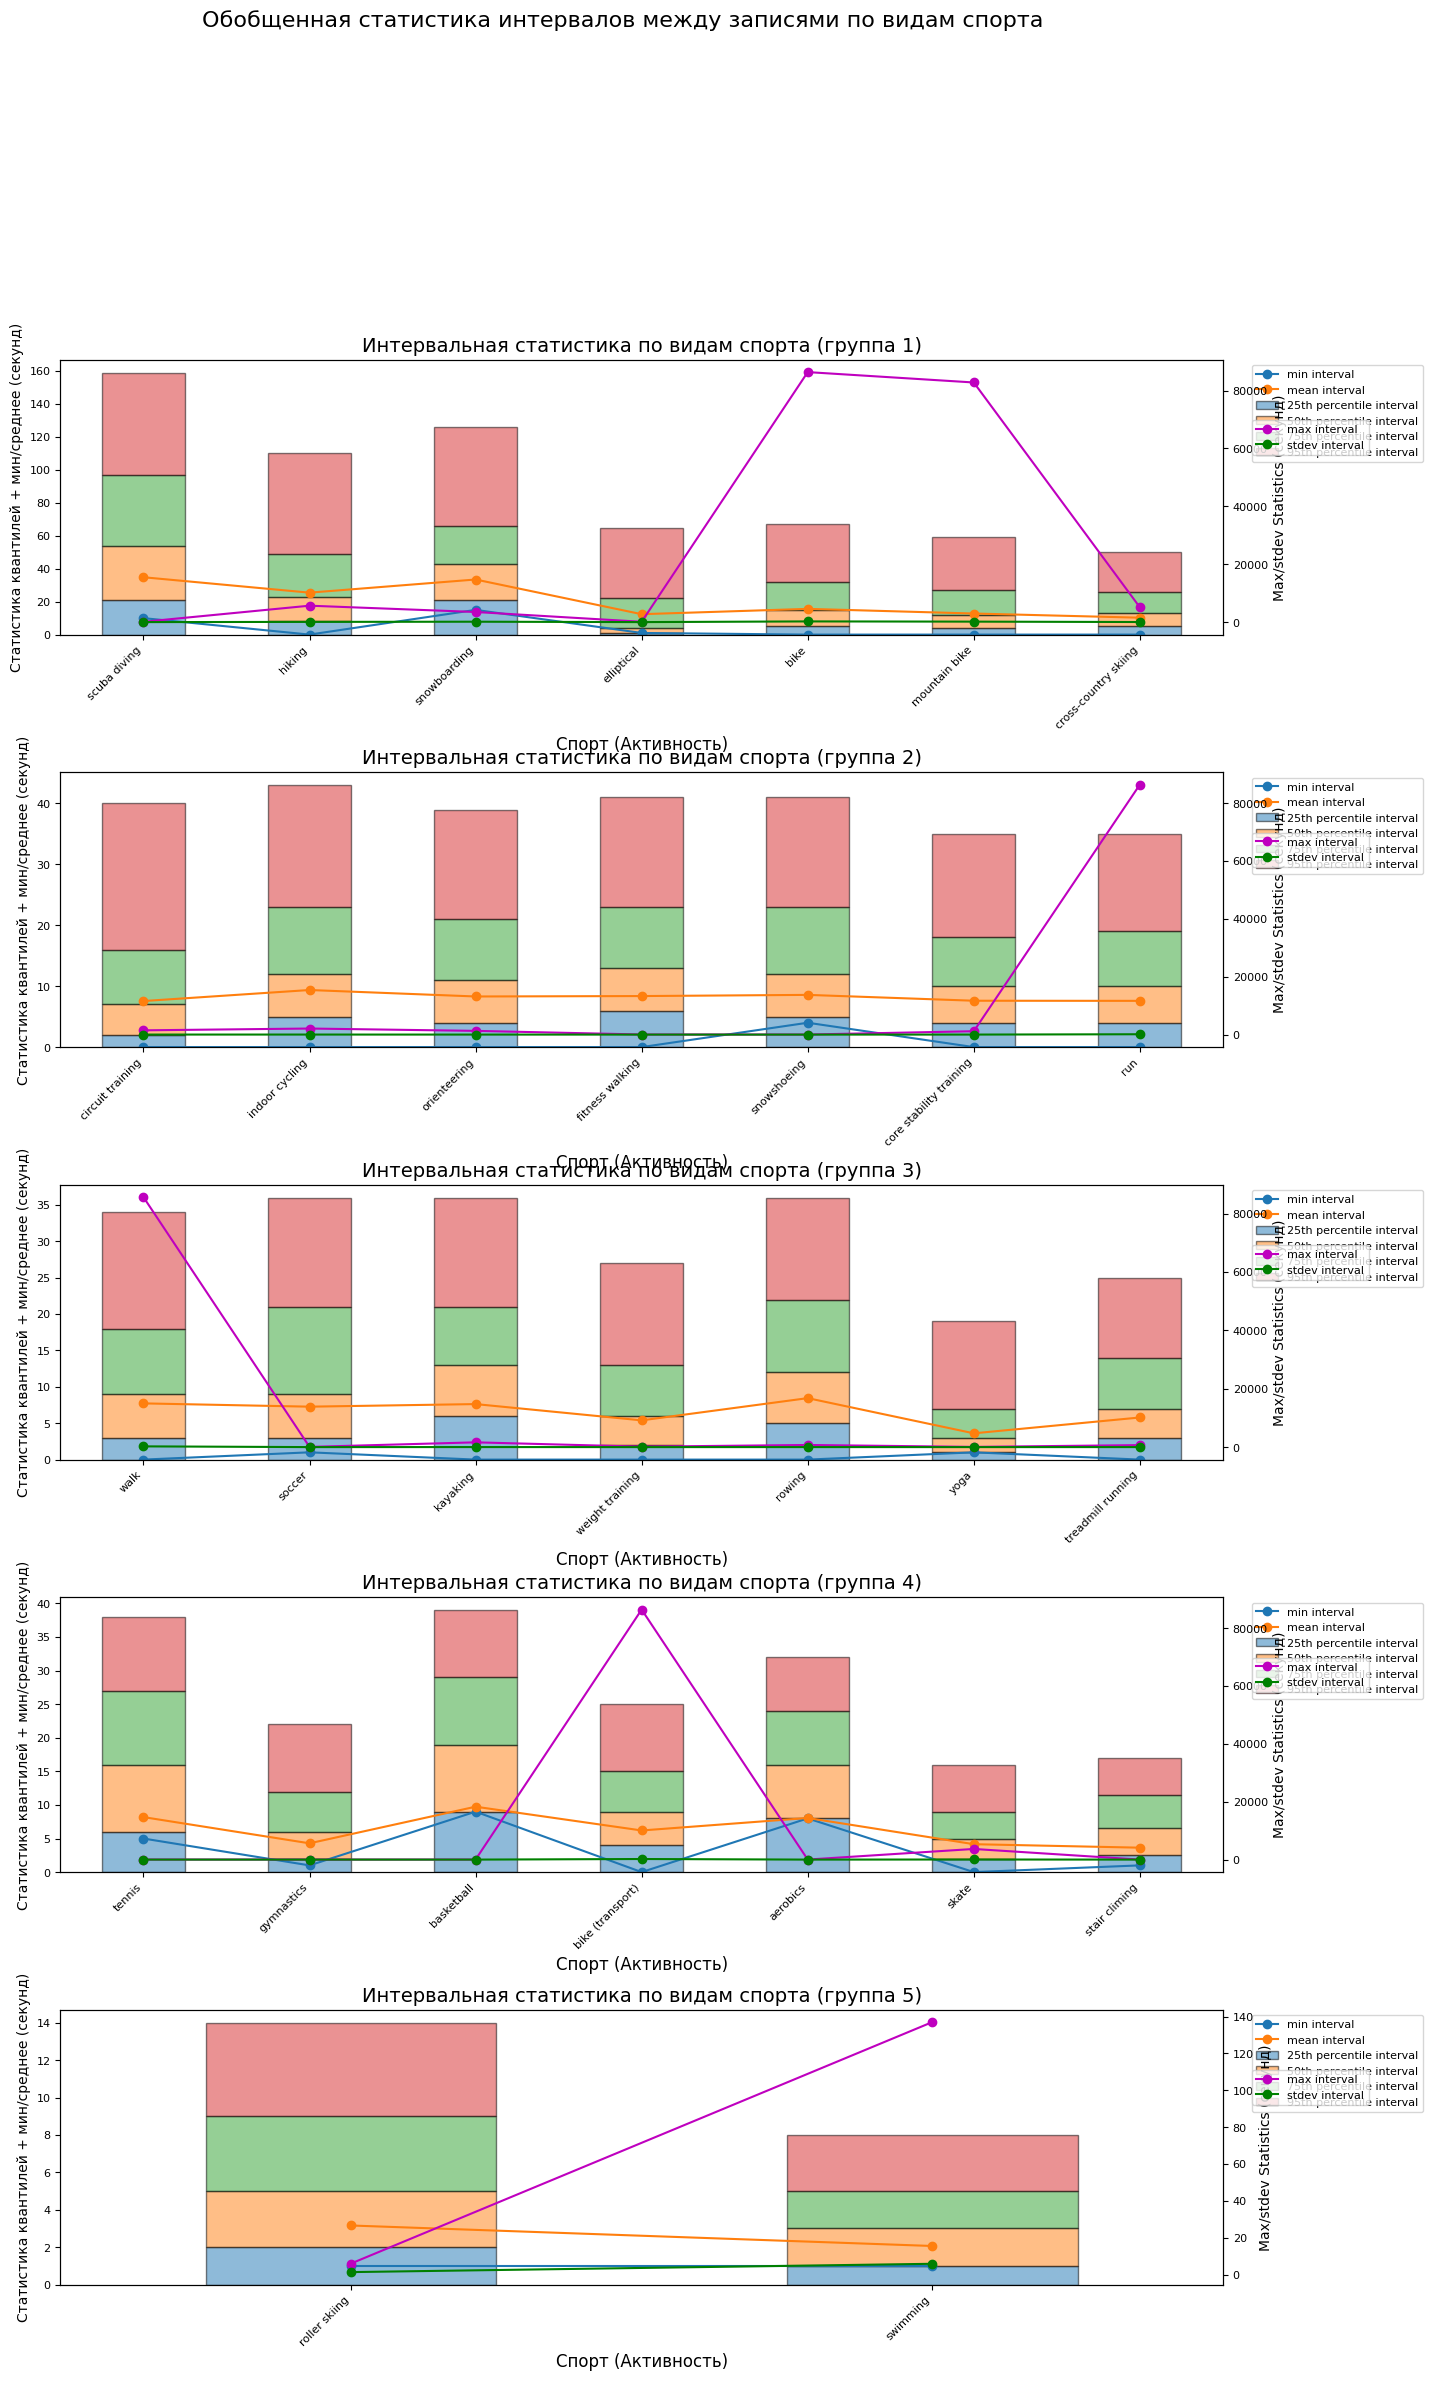

In [55]:
import numpy as np
import matplotlib.pyplot as plt

print('\nОбобщенная статистика интервальных видов спорта:')

bar_columns = ['25th percentile interval', '50th percentile interval', '75th percentile interval', '95th percentile interval']
line_columns1 = ['min interval', 'mean interval']
line_columns2 = ['max interval', 'stdev interval']

# Сортируем по 95-му процентилю
interval_statistic_df = interval_statistic_df.sort_values(by='95th percentile interval', ascending=False)

# Динамически определяем количество графиков
n_sports = len(interval_statistic_df)
sports_per_plot = 7
n_plots = min(7, (n_sports + sports_per_plot - 1) // sports_per_plot)  # Округление вверх

if n_plots == 0:
    print("Нет данных для построения графиков")
else:
    figsize = (15, 5 * n_plots)  # Увеличиваем ширину и высоту для лучшего отображения
    fig, axs = plt.subplots(nrows=n_plots, figsize=figsize)

    # Если только один график, преобразуем axs в массив
    if n_plots == 1:
        axs = [axs]

    for i in range(n_plots):
        start_idx = i * sports_per_plot
        end_idx = min((i + 1) * sports_per_plot, n_sports)

        if start_idx >= n_sports:
            # Нет данных для этого графика, скрываем его
            axs[i].set_visible(False)
            continue

        interval_statistic_sub_df = interval_statistic_df.iloc[start_idx:end_idx]

        # Проверяем, что данные есть
        if len(interval_statistic_sub_df) == 0:
            axs[i].set_visible(False)
            continue

        # Plot the bar chart for the quantiles
        plot1 = interval_statistic_sub_df[['sport'] + bar_columns].set_index('sport').plot(
            kind='bar', stacked=True, grid=False, alpha=0.5, edgecolor='black', ax=axs[i]
        )

        # Plot the line chart for min and mean intervals
        plot2 = interval_statistic_sub_df[['sport'] + line_columns1].plot(x='sport', ax=axs[i], marker='o')

        # Create a secondary y-axis for max and stdev intervals
        ax2 = axs[i].twinx()
        plot3 = interval_statistic_sub_df[['sport'] + line_columns2].plot(x='sport', ax=ax2, marker='o', color=['m', 'g'])

        # Titles and labels
        axs[i].set_title(f'Интервальная статистика по видам спорта (группа {i+1})', fontsize=14)
        axs[i].set_xlabel('Спорт (Активность)', fontsize=12)
        axs[i].set_ylabel('Статистика квантилей + мин/среднее (секунд)', fontsize=10)
        ax2.set_ylabel('Max/stdev Statistics (секунд)', fontsize=10)

        # Legends for the plots
        axs[i].legend(loc='upper left', fontsize=8, bbox_to_anchor=(1.02, 1))
        ax2.legend(loc='upper left', fontsize=8, bbox_to_anchor=(1.02, 0.8))

        # Formatting for x-ticks and labels
        axs[i].set_xticklabels(interval_statistic_sub_df['sport'], rotation=45, ha='right', fontsize=9)

        # Set font size for y-axis ticks
        axs[i].tick_params(axis='both', labelsize=8)
        ax2.tick_params(axis='y', labelsize=8)

    # Adjust the layout for better visualization
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    # Общий заголовок для всей фигуры
    fig.suptitle('Обобщенная статистика интервалов между записями по видам спорта', fontsize=16, y=1.02)

    # Show the plot
    plt.show()

до 95% набора интервальных данных не имеют интервала более 400 секунд, в то время как есть лишь несколько выбросов, из-за которых максимальные интервалы достигают 86400 секунд (полных дней).

### Время начала тренировки
Мы снова используем гистограмму, чтобы посмотреть на распределение часов начала тренировок, сгруппированных по видам спорта и с разбивкой по полу. Мы делим день на интервалы по 2 часа, всего получается 12 частей.

In [56]:
# Получите таблицу пола, вида спорта и времени начала тренировки для построения графика.
start_time_df = df.select('gender', 'sport','workout_start_time').toPandas()


График распределения времени начала тренировки по видам спорта с разбивкой по полу:


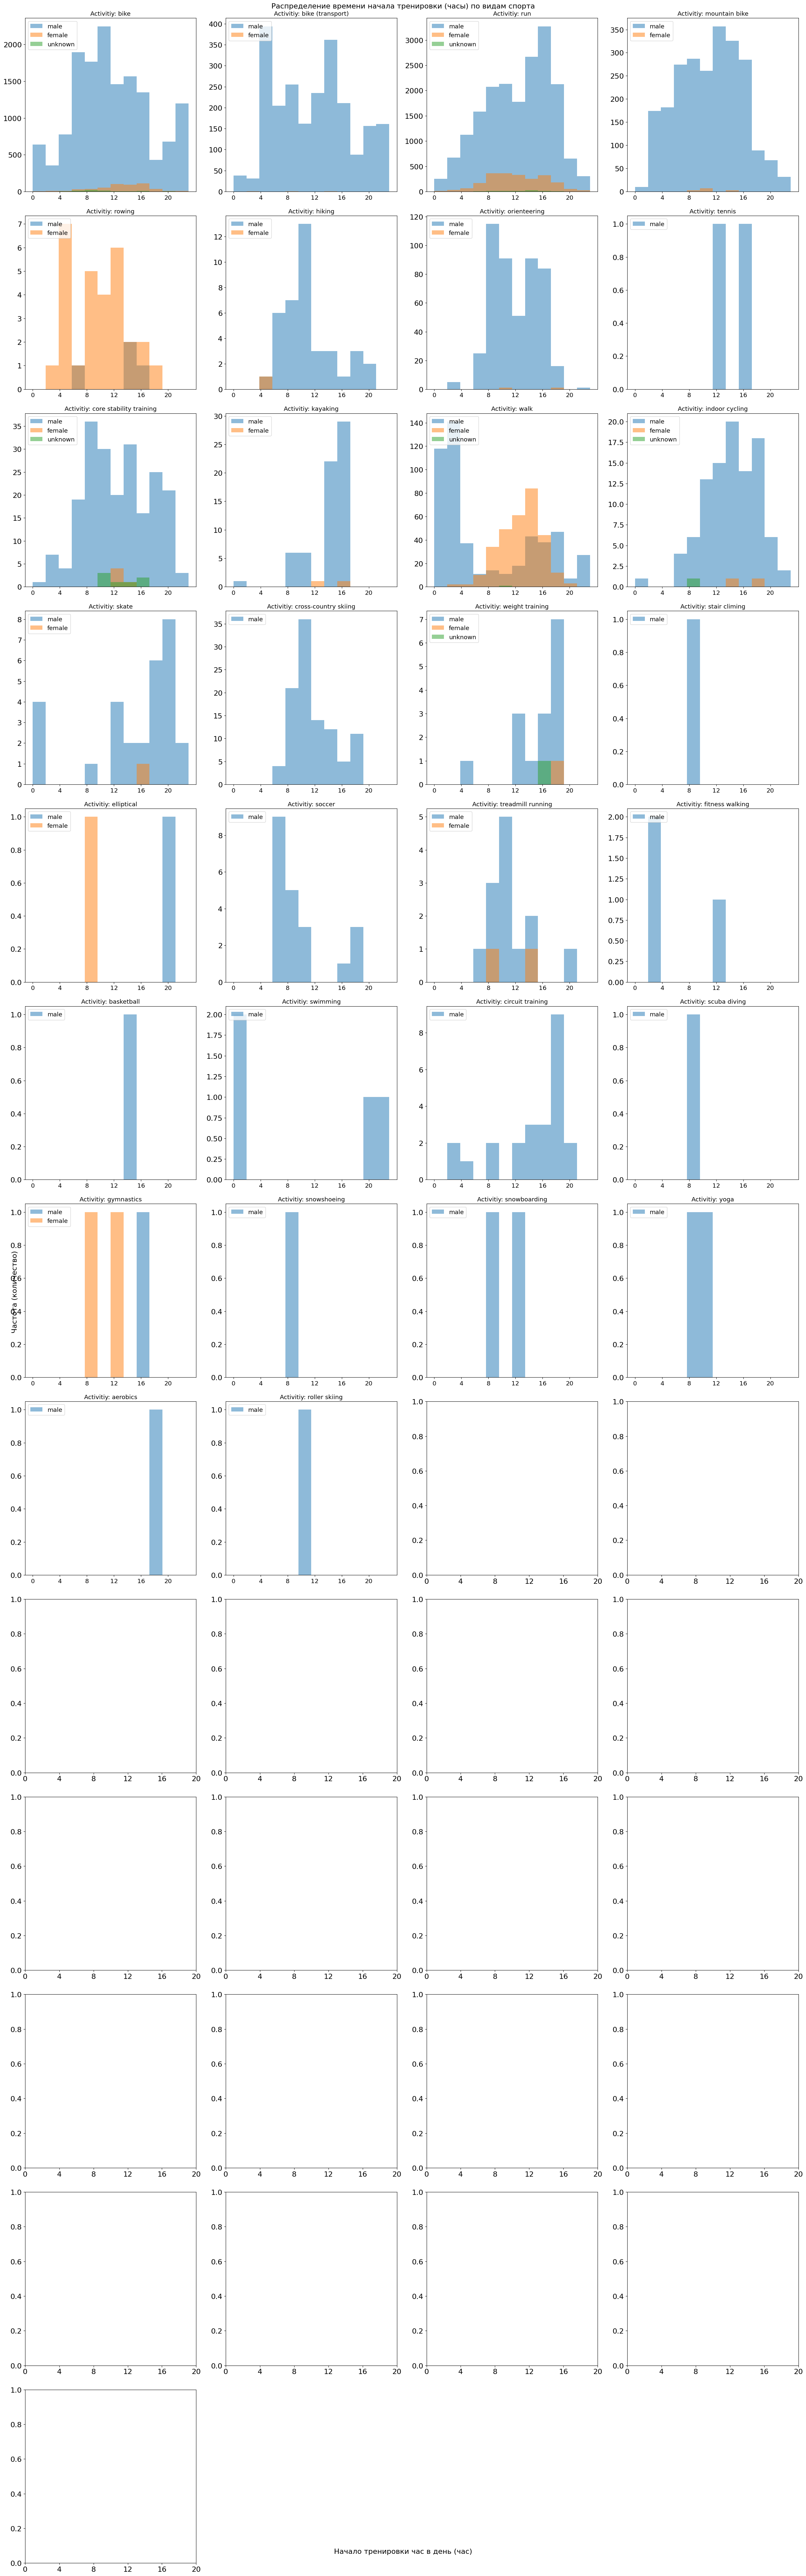

In [57]:
activities = start_time_df['sport'].unique()
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = (plot_size_x + 0.5) * 4 +3, (plot_size_y + 1) * 13 + 1


nrows, ncols = 13, 4
a = fig.subplots_adjust(hspace = 1, wspace = 1)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize_x, figsize_y))
print('\nГрафик распределения времени начала тренировки по видам спорта с разбивкой по полу:')
a = plt.setp(axs, xticks=[0, 4, 8, 12, 16, 20])
for index, sport in enumerate(activities):
    row_index, col_index = divmod(index, ncols)
    male_start_time_list = start_time_df[(start_time_df.sport == sport) &
                                            (start_time_df.gender == 'male')]['workout_start_time']
    female_start_time_list = start_time_df[(start_time_df.sport == sport) &
                                            (start_time_df.gender == 'female')]['workout_start_time']
    unknown_start_time_list = start_time_df[(start_time_df.sport == sport) &
                                            (start_time_df.gender == 'unknown')]['workout_start_time']
    if len(male_start_time_list) > 0:
        male_dist = axs[row_index, col_index].hist(male_start_time_list,
                                      bins = 12, alpha=0.5, label='male', range=(0, 23))
    if len(female_start_time_list) > 0:
        female_dist = axs[row_index, col_index].hist(female_start_time_list,
                                      bins = 12, alpha=0.5, label='female', range=(0, 23))
    if len(unknown_start_time_list) > 0:
        unknown_dist = axs[row_index, col_index].hist(unknown_start_time_list,
                                      bins = 12, alpha=0.5, label = 'unknown', range=(0, 23))
    b= axs[row_index, col_index].set_title('Activitiy: ' + sport, fontsize='small')
    a = axs[row_index, col_index].legend(loc="upper left", fontsize='small')
    a = plt.setp(axs[row_index, col_index].get_xticklabels(), fontsize='small')

for i in range(1,4):
    x = axs[12, i].set_visible(False)
a = fig.tight_layout()
z = fig.text(0.5, 1, 'Распределение времени начала тренировки (часы) по видам спорта'
             , ha='center', va='top', transform=fig.transFigure)
y = fig.text(0.5, 0.01, 'Начало тренировки час в день (час)'
             , ha='center', va='bottom', transform=fig.transFigure)
z = fig.text(0.02, 0.5, 'Частота (количество)', va='center', rotation='vertical');

Из приведенных выше диаграмм распределения видно, что в большинстве видов спорта занятия начинаются либо утром, либо вечером (бимодальное распределение), что имеет смысл. В период с 0 до 4 часов происходит несколько событий, что довольно странно.
<br />

### Посмотрите глубже на информацию на уровне строки

In [58]:
stat_list = ['min', '25th percentile', 'mean', '95th percentile', 'max', 'stdev']
heart_rate_statistic_df = retrieve_array_column_stat_df(df, column_name='heart_rate', stat_list=stat_list)

*Из-за огромного количества пользователей и количества тренировок мы случайным образом выбрали до x количества пользователей каждого пола (например, 5) и до y тренировок по каждому типу активности (например, 10).<br />*

In [61]:
# Вспомогательная функция, которая помогает отбирать данные
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    '''
          max_users_per_gender: максимальное количество пользователей, выбираемых случайным образом для каждого пола.
          max_workouts_per_sport: максимальное количество занятий, которые можно выбрать для каждого вида спорта.
          (виды спорта, существующие у выбранных пользователей)
    '''
    # Получение уникального списка идентификаторов пользователя и пола для выборки.
    users_genders = df.select('userId', 'gender').distinct().toPandas()
    #Выбор до трех идентификаторов пользователей каждого пола из уникального списка идентификаторов пользователей.
    random_x_users_per_gender = users_genders.groupby('gender')['userId'].apply(
                lambda s: s.sample(min(len(s), max_users_per_gender))
    )

    # Применение фильтра к pyspark dataframe для выборки.
    samples_by_gender = df.where(df.userId.isin(list(random_x_users_per_gender)))

    # Генерация уникальных идентификаторов занятий и списков видов спорта из выборочного набора данных.
    workout_sports = samples_by_gender.select('id', 'sport').distinct().toPandas()
    # выбор до 10 идентификаторов занятий для каждого вида спорта.
    random_y_workouts_per_sport = workout_sports.groupby('sport')['id'].apply(
        lambda s: s.sample(min(len(s), max_workouts_per_sport))
    )

    # фильтр к выборочному набору данных, чтобы продолжить сокращать количество тренировок для каждого типа активности.
    samples_by_gender_and_sport = samples_by_gender.where(df.id.isin(list(random_y_workouts_per_sport)))
    return samples_by_gender_and_sport

In [62]:
# Использование 2 переменных для определения критериев выборки:
# максимальное количество пользователей по полу и максимальное количество тренировок по виду спорта
max_users_per_gender, max_workouts_per_sport = 20, 15

# Сбор набора выборочных данных в Pandas для использования с функциями графика.
pd_df = sampling_data(max_users_per_gender, max_workouts_per_sport).toPandas()
print('\nОбзор выборочных данных (только строковые и числовые столбцы)):')
pd_df.describe()


Обзор выборочных данных (только строковые и числовые столбцы)):


id        userId  PerWorkoutRecordCount  workout_start_time  \
count  1.550000e+02  1.550000e+02             155.000000          155.000000   
mean   3.531934e+08  4.527933e+06             375.606452           11.270968   
std    1.406974e+08  4.320173e+06             171.605009            4.668643   
min    3.101292e+07  1.820420e+05               1.000000            1.000000   
25%    2.674574e+08  7.752770e+05             252.000000            8.000000   
50%    3.351657e+08  3.841089e+06             500.000000           11.000000   
75%    4.696774e+08  8.467445e+06             500.000000           14.000000   
max    6.278011e+08  1.424442e+07             500.000000           23.000000   

         duration  
count  155.000000  
mean    51.630539  
std     42.662735  
min      0.000000  
25%     21.583333  
50%     47.700001  
75%     63.724998  
max    243.533340

нормализуем время для всех тренировок, рассчитав продолжительность (в секундах) каждой записи временной метки из первой записи тренировки (первый элемент datetime списка в этой тренировке). <br />
Затем отображаем частоту сердечных сокращений в зависимости от этого нормализованного времени, группируя по видам спорта.

New normalized datetime (first 7 rows):


userId             sport  \
0  4969375  bike (transport)   
1  4969375  bike (transport)   
2  4969375  bike (transport)   
3   279317            rowing   
4   279317            hiking   
5   279317            rowing   
6   279317            rowing   

                                           date_time  \
0  [2013-04-01 08:52:17, 2013-04-01 08:52:19, 201...   
1  [2012-11-11 11:35:06, 2012-11-11 11:35:12, 201...   
2  [2012-04-03 14:24:11, 2012-04-03 14:24:14, 201...   
3  [2015-08-02 17:03:20, 2015-08-02 17:03:26, 201...   
4  [2014-07-01 04:22:16, 2014-07-01 04:23:26, 201...   
5  [2014-06-16 14:03:31, 2014-06-16 14:03:37, 201...   
6  [2014-06-16 13:44:06, 2014-06-16 13:44:10, 201...   

                                normalized_date_time  
0  [0, 2, 4, 8, 10, 15, 19, 24, 28, 36, 39, 44, 5...  
1  [0, 6, 12, 17, 25, 26, 32, 41, 56, 68, 74, 87,...  
2  [0, 3, 5, 8, 10, 13, 24, 35, 40, 41, 42, 46, 5...  
3  [0, 6, 9, 11, 16, 18, 20, 22, 26, 28, 30, 35, ...  
4  [0, 70, 138, 198, 258, 319, 384, 445, 508, 572...  
5  [0, 6, 12, 21, 27, 32, 38, 48, 54, 61, 68, 77,...  
6  [0, 4, 8, 11, 14, 17, 21, 24, 28, 31, 35, 39, ...


Построение необработанного пульс (выборка) по нормированному времени:


/tmp/ipython-input-963909779.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticklabels_i = axs[sport_index].set_xticklabels(
/tmp/ipython-input-963909779.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticklabels_i = axs[sport_index].set_xticklabels(
/tmp/ipython-input-963909779.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticklabels_i = axs[sport_index].set_xticklabels(
/tmp/ipython-input-963909779.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xsticklabels_i = axs[sport_index].set_xticklabels(
/tmp/ipython-input-963909779.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

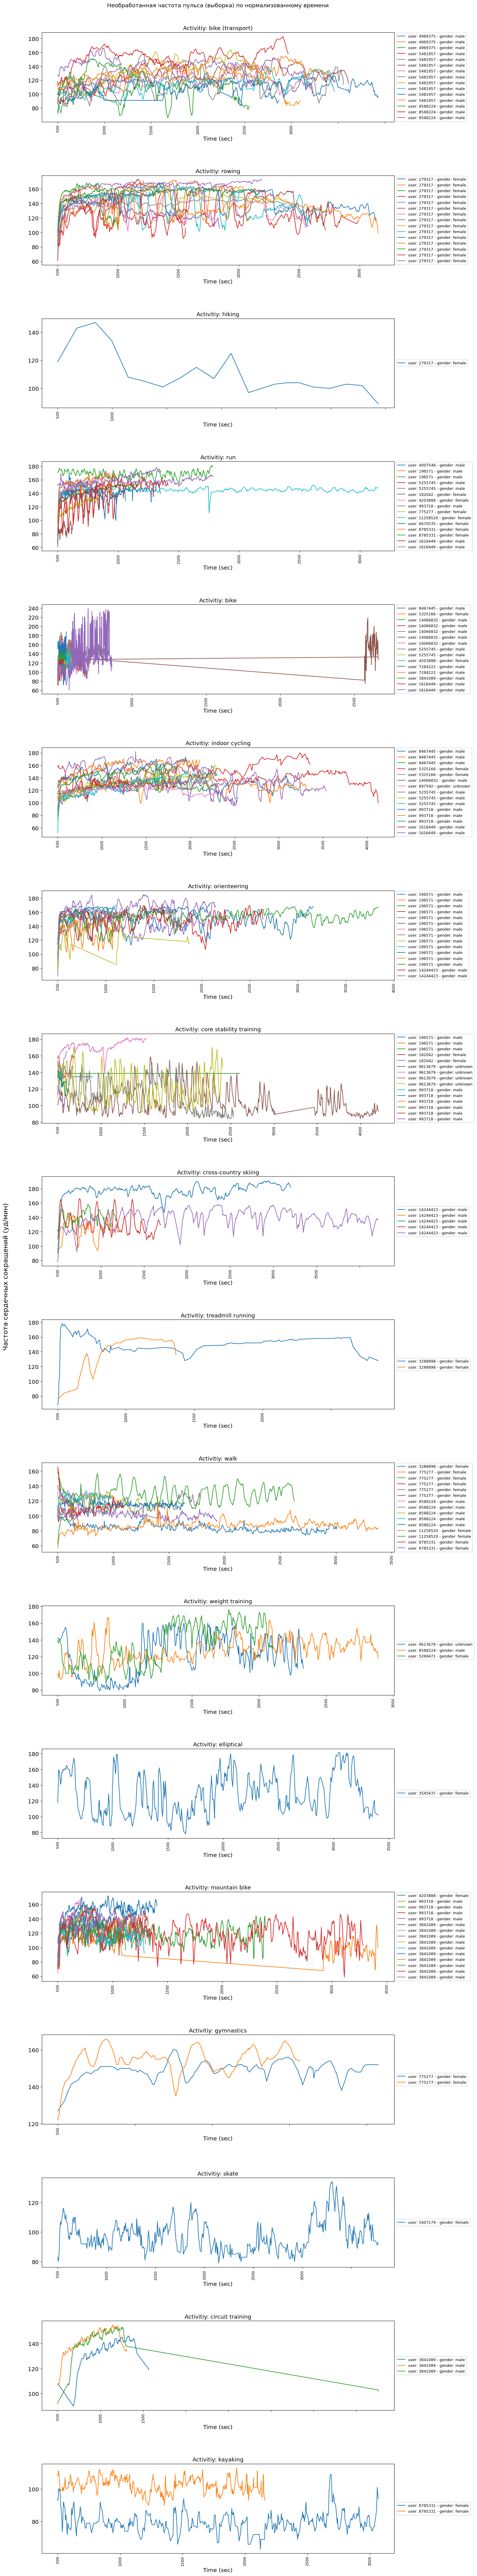

In [63]:
# Лямбда-функция для объединения списка списков в один большой список
flattern = lambda l: set([item for sublist in l for item in sublist])

normalized_datetime_list = []
for index,data_row in pd_df.iterrows():
    min_date_time = min(data_row['date_time'])
    normalized_datetime_list.append(
        [(date_time - min_date_time).seconds for date_time in data_row['date_time']]
    )

pd_df['normalized_date_time'] = normalized_datetime_list

print('New normalized datetime (first 7 rows):')
pd_df.head(7)[['userId', 'sport', 'date_time','normalized_date_time']]

print('\nПостроение необработанного пульс (выборка) по нормированному времени:')

sport_list = pd_df['sport'].unique()
# Динамическое определение длины фигуры зависит от длины спортивного списка.
fig, axs = plt.subplots(len(sport_list), figsize=(15, 6*len(sport_list)))
subplot_adj = fig.subplots_adjust(hspace = 0.6)
plot_setp = plt.setp(axs, yticks=range(0,250,20))

for sport_index, sport in enumerate(sport_list):
    workout = pd_df[pd_df.sport == sport]
    max_time = max(flattern(workout.normalized_date_time))
    for workout_index, data_row in workout.iterrows():
        label = 'user: ' + str(data_row['userId']) + ' - gender: ' + data_row['gender']
        plot_i = axs[sport_index].plot(
            data_row['normalized_date_time'], data_row['heart_rate'], label=label
        )
    title_i = axs[sport_index].set_title('Activitiy: ' + sport, fontsize='small')
    xlabel_i = axs[sport_index].set_xlabel('Time (sec)', fontsize='small')
    xsticklabels_i = axs[sport_index].set_xticklabels(
        range(0, max_time, 500),rotation = 'vertical', fontsize=9
    )
    ysticklabels_i = axs[sport_index].set_yticklabels(range(0,250,20),fontsize='small')
    legend_i = axs[sport_index].legend(
        loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 9}
    )

x_label = fig.text(0.04, 0.5, 'Частота сердечных сокращений (уд/мин)', va='center', rotation='vertical')
chart_title = fig.text(0.5, 1.3, 'Необработанная частота пульса (выборка) по нормализованному времени',
            ha='center', va='center', fontsize='small', transform=axs[0].transAxes)


ЗАДАНИЕ 3:
Ограничения использования выборки для анализа пульса:

1. Ограничение репрезентативности: выборка может не отражать все закономерности генеральной совокупности
2. Смещение выборки: если выборка не случайна, могут возникнуть систематические ошибки
3. Потеря информации: мелкие, но важные паттерны могут быть утеряны
4. Недостаточная мощность: для редких событий или небольших подгрупп данных может не хватить
5. Зависимость от метода выборки: разные методы дают разные результаты
6. Проблемы с временными рядами: может нарушаться временная структура данных
7. Не учитывает сезонность: если выборка не охватывает все периоды

Рекомендации:
- Использовать стратифицированную выборку для сохранения распределения по ключевым признакам
- Проверять репрезентативность выборки
- Учитывать размер выборки (правило 30+ для ЦПТ)
- Использовать несколько случайных выборок для проверки устойчивости результатов

In [69]:
# Функция для создания выборки
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    # ... (код из оригинального примера)
    pass


'\nЗАДАНИЕ 4:\nПодсчет количества каждой активности в result_pdf\n'

Количество каждой активности в result_pdf:
sport
run                 63
bike                25
bike (transport)    12
Name: count, dtype: int64

Альтернативный подсчет:
sport
bike                25
bike (transport)    12
run                 63
dtype: int64


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='sport'>

Text(0.5, 1.0, 'Распределение активностей в выборке (100 записей)')

Text(0.5, 0, 'Вид спорта')

Text(0, 0.5, 'Количество')

(array([0, 1, 2]),
 [Text(0, 0, 'run'), Text(1, 0, 'bike'), Text(2, 0, 'bike (transport)')])

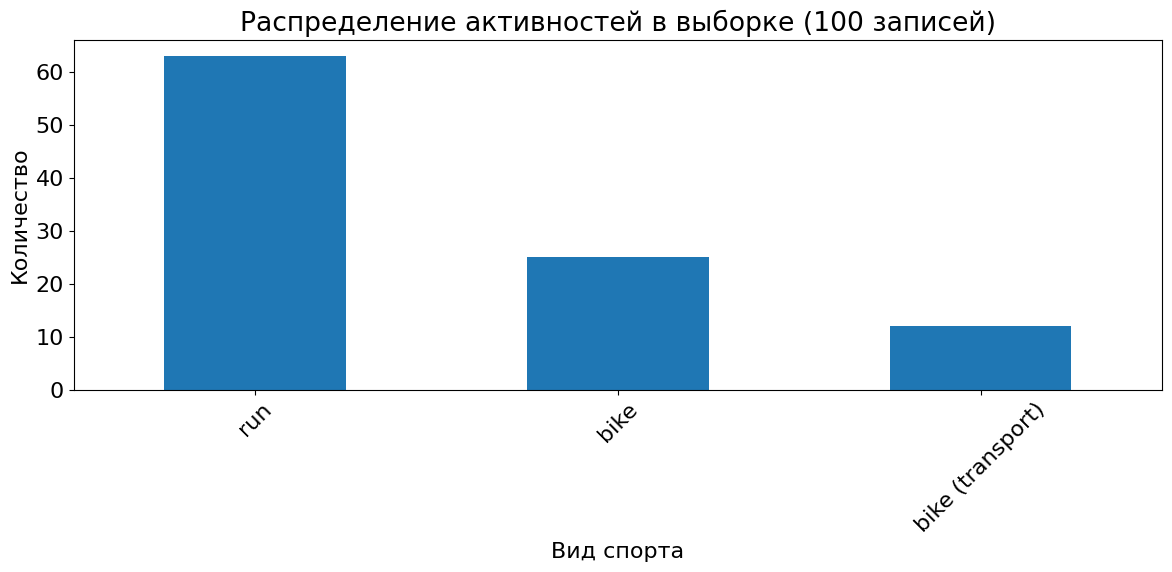

In [66]:

"""
ЗАДАНИЕ 4:
Подсчет количества каждой активности в result_pdf
"""
# Создаем result_pdf как в задании
result_pdf = df.select('sport').limit(100).toPandas()

# Код для подсчета количества каждой активности
activity_counts = result_pdf['sport'].value_counts()
print("Количество каждой активности в result_pdf:")
print(activity_counts)

# Альтернативный способ с groupby
activity_counts_alt = result_pdf.groupby('sport').size()
print("\nАльтернативный подсчет:")
print(activity_counts_alt)

# Визуализация
plt.figure(figsize=(12, 6))
activity_counts.plot(kind='bar')
plt.title('Распределение активностей в выборке (100 записей)')
plt.xlabel('Вид спорта')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ЗАДАНИЕ 5:
Шаги предобработки данных для Spark MLlib:

Для категориальных признаков (gender, sport):
1. StringIndexer: Преобразование строковых значений в числовые индексы
   from pyspark.ml.feature import StringIndexer
   indexer = StringIndexer(inputCol="gender", outputCol="gender_index")

2. OneHotEncoder: Преобразование категориальных признаков в бинарный формат
   from pyspark.ml.feature import OneHotEncoder
   encoder = OneHotEncoder(inputCol="gender_index", outputCol="gender_vec")

Для числовых признаков (duration):
1. VectorAssembler: Объединение числовых признаков в вектор
   from pyspark.ml.feature import VectorAssembler
   assembler = VectorAssembler(inputCols=["duration"], outputCol="features")

2. StandardScaler/Normalizer: Масштабирование числовых признаков
   from pyspark.ml.feature import StandardScaler
   scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

3. MinMaxScaler: Нормализация в диапазон [0, 1]
   from pyspark.ml.feature import MinMaxScaler
   minmax = MinMaxScaler(inputCol="features", outputCol="minmax_features")

Полный пайплайн:
1. StringIndexer для всех категориальных признаков
2. OneHotEncoder для индексированных категориальных признаков
3. VectorAssembler для объединения всех признаков
4. StandardScaler для масштабирования числовых признаков
5. Разделение на train/test выборки

    ```
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler

    # Индексация категориальных признаков
    gender_indexer = StringIndexer(inputCol="gender", outputCol="gender_index")
    sport_indexer = StringIndexer(inputCol="sport", outputCol="sport_index")

    # One-hot encoding
    gender_encoder = OneHotEncoder(inputCol="gender_index", outputCol="gender_vec")
    sport_encoder = OneHotEncoder(inputCol="sport_index", outputCol="sport_vec")

    # Объединение признаков
    assembler = VectorAssembler(
        inputCols=["gender_vec", "sport_vec", "duration"],
        outputCol="raw_features"
    )

    # Масштабирование
    scaler = StandardScaler(inputCol="raw_features", outputCol="features")

    # Создание пайплайна
    pipeline = Pipeline(stages=[
        gender_indexer, sport_indexer,
        gender_encoder, sport_encoder,
        assembler, scaler
    ])

    # Применение пайплайна
    model = pipeline.fit(df)
    transformed_df = model.transform(df)
    ```

In [74]:
# ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ (по желанию)

# Анализ продолжительности тренировок
duration_stats = df.select('duration').toPandas().describe()
print("\nСтатистика продолжительности тренировок:")
print(duration_stats)

# Анализ по полу
gender_stats = df.groupBy('gender').count().toPandas()
print("\nРаспределение по полу:")
print(gender_stats)

# Закрытие Spark сессии (важно для освобождения ресурсов)
spark.stop()

print("\n" + "="*50)
print("АНАЛИЗ ЗАВЕРШЕН")
print("="*50)


Статистика продолжительности тренировок:
           duration
count  42494.000000
mean      78.228294
std       87.493980
min        0.000000
25%       31.870833
50%       54.200001
75%       93.429167
max     1404.949951

Распределение по полу:
    gender  count
0  unknown    173
1   female   3033
2     male  39288

АНАЛИЗ ЗАВЕРШЕН


### Перемещения во время тренировки
У нас будет некоторая визуализация в трех столбцах с информацией о смещении/геометрии (`longitude`,`latitude` и `altitude`).
Поскольку  расположение каждого пользователя и тренировки отличается друг от друга, мы отображаем только несколько отдельных тренировок на 3D-графиках, чтобы просмотреть маршрут тренировки.


In [71]:
# Определяем функцию sampling_data
def sampling_data(max_users_per_gender, max_workouts_per_sport):
    '''
    max_users_per_gender: максимальное количество пользователей, выбираемых случайным образом для каждого пола.
    max_workouts_per_sport: максимальное количество занятий, которые можно выбрать для каждого вида спорта.
    '''
    # Получение уникального списка идентификаторов пользователя и пола для выборки
    users_genders = df.select('userId', 'gender').distinct().toPandas()

    # Выбор до max_users_per_gender идентификаторов пользователей каждого пола
    random_x_users_per_gender = users_genders.groupby('gender')['userId'].apply(
        lambda s: s.sample(min(len(s), max_users_per_gender))
    )

    # Применение фильтра к PySpark DataFrame для выборки
    samples_by_gender = df.filter(df.userId.isin(list(random_x_users_per_gender)))

    # Генерация уникальных идентификаторов занятий и списков видов спорта
    workout_sports = samples_by_gender.select('id', 'sport').distinct().toPandas()

    # Выбор до max_workouts_per_sport идентификаторов занятий для каждого вида спорта
    random_y_workouts_per_sport = workout_sports.groupby('sport')['id'].apply(
        lambda s: s.sample(min(len(s), max_workouts_per_sport))
    )

    # Фильтр для сокращения количества тренировок для каждого типа активности
    samples_by_gender_and_sport = samples_by_gender.filter(
        samples_by_gender.id.isin(list(random_y_workouts_per_sport))
    )

    return samples_by_gender_and_sport

# Теперь вызываем функцию
pd_df_small = sampling_data(max_users_per_gender=2, max_workouts_per_sport=2).toPandas()

print('Выборочные данные (2 пользователя, 2 тренировки на вид спорта):')
print(f"Размер выборки: {pd_df_small.shape[0]} строк, {pd_df_small.shape[1]} столбцов")

# Проверяем, что данные получены
if pd_df_small.empty:
    print("Внимание: выборка пустая!")
else:
    # Показываем описание выбранных столбцов
    desc_cols = ['userId', 'gender', 'sport', 'id', 'workout_start_time',
                 'PerWorkoutRecordCount', 'duration', 'longitude', 'latitude', 'altitude']

    # Выбираем только те столбцы, которые есть в DataFrame
    available_cols = [col for col in desc_cols if col in pd_df_small.columns]

    print("\nОписательная статистика:")
    print(pd_df_small[available_cols].describe())

    print("\nПервые 5 строк выборки:")
    print(pd_df_small.head())

    # Проверяем распределение по полу и видам спорта
    print("\nРаспределение по полу:")
    print(pd_df_small['gender'].value_counts())

    print("\nРаспределение по видам спорта:")
    print(pd_df_small['sport'].value_counts())

Выборочные данные (2 пользователя, 2 тренировки на вид спорта):
Размер выборки: 15 строк, 16 столбцов

Описательная статистика:
             userId            id  workout_start_time  PerWorkoutRecordCount  \
count  1.500000e+01  1.500000e+01           15.000000              15.000000   
mean   5.224526e+06  3.785275e+08           10.866667             399.066667   
std    5.001426e+06  1.005586e+08            5.475486             182.216695   
min    2.793170e+05  1.767948e+08            2.000000              20.000000   
25%    5.884545e+05  3.336989e+08            7.000000             399.000000   
50%    3.445572e+06  3.615611e+08           11.000000             500.000000   
75%    1.182504e+07  4.065249e+08           15.000000             500.000000   
max    1.182504e+07  5.818476e+08           19.000000             500.000000   

         duration  
count   15.000000  
mean    68.788895  
std     46.023426  
min     16.583334  
25%     48.916668  
50%     60.016666  
75%     70.

Построение траекторий тренировки в виде 3D для каждой тренировки:


Text(0.5, 0.92, 'Активность: hiking - Пол: female\nРекорды: 20 - Длительность: 19 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(12.158921536988364, 12.174688463011636)

(47.63841573740254, 47.65734826259746)

(466.33001679524637, 582.0659832047536)

Text(0.5, 0.92, 'Активность: rowing - Пол: female\nРекорды: 298 - Длительность: 16 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(12.588642418870021, 12.599167581129977)

(55.73995433705859, 55.75408966294141)

(-6.95862045130556, -0.04137954869443969)

Text(0.5, 0.92, 'Активность: rowing - Пол: female\nРекорды: 71 - Длительность: 69 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(12.581678388458656, 12.614178611541345)

(55.70067635154384, 55.781004648456154)

(-11.270620345360216, 14.470620345360217)

Text(0.5, 0.92, 'Активность: orienteering - Пол: female\nРекорды: 500 - Длительность: 48 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(12.363958126600084, 12.409179773399917)

(55.87685399404338, 55.893391505956615)

(24.58996058603981, 74.8100394139602)

Text(0.5, 0.92, 'Активность: indoor cycling - Пол: unknown\nРекорды: 97 - Длительность: 60 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(6.7143451612608755, 6.714570738739125)

(53.14229754023104, 53.14250095976896)

(-16.309795405454903, 23.9097954054549)

Text(0.5, 0.92, 'Активность: bike - Пол: male\nРекорды: 500 - Длительность: 48 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(4.255268154957745, 4.482554848945286)

(51.22031360705022, 51.32618651884969)

(-8.87717856270869, 8.67717856270869)

Text(0.5, 0.92, 'Активность: mountain bike - Пол: male\nРекорды: 500 - Длительность: 189 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(4.318457303149664, 4.475676918821371)

(51.267941319410845, 51.42809782640155)

(11.917243394745803, 45.28275660525419)

Text(0.5, 0.92, 'Активность: bike (transport) - Пол: male\nРекорды: 500 - Длительность: 62 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(4.256595414732866, 4.481008570040293)

(51.22032777822797, 51.32652170539613)

(5.280836133445563, 22.919163866554435)

Text(0.5, 0.92, 'Активность: bike (transport) - Пол: male\nРекорды: 500 - Длительность: 52 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(4.255523931018358, 4.482208799787516)

(51.219931266314255, 51.326811599501504)

(-3.2881821349787006, 15.8881821349787)

Text(0.5, 0.92, 'Активность: mountain bike - Пол: male\nРекорды: 500 - Длительность: 157 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(4.415810470861057, 4.562632330301543)

(51.258217104067256, 51.32655361824746)

(-141.72885003945143, 81.92885003945143)

Text(0.5, 0.92, 'Активность: walk - Пол: male\nРекорды: 500 - Длительность: 75 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(-0.8578239201342402, -0.8237850798657598)

(37.729490515878986, 37.762541484121016)

(1.0643137689086513, 8.93568623109135)

Text(0.5, 0.92, 'Активность: walk - Пол: male\nРекорды: 500 - Длительность: 54 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(-1.1609325606864678, -1.1285284393135322)

(37.974588788764095, 37.983619211235904)

(46.59518167430507, 55.784818325694935)

Text(0.5, 0.92, 'Активность: bike - Пол: male\nРекорды: 500 - Длительность: 71 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(-1.2425413197596284, -1.1096286802403716)

(37.97212401382209, 38.001298986177915)

(39.0072976725006, 59.9927023274994)

Text(0.5, 0.92, 'Активность: run - Пол: male\nРекорды: 500 - Длительность: 62 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(-3.797629001134854, -3.6865614442584698)

(40.409368047502326, 40.423954740155054)

(560.8342192321237, 702.1657807678763)

Text(0.5, 0.92, 'Активность: run - Пол: male\nРекорды: 500 - Длительность: 42 минуты')

Text(0.5, 0, 'Долгота (градусы)')

Text(0.5, 0.5, 'Широта (градусы)')

Text(0.5, 0, 'Высота (м)')

(-1.1794673093716883, -1.1296723316301323)

(37.97342913635425, 37.988147293772776)

(45.637496360906866, 73.96250363909314)

Text(0.5, 1.02, 'Маршрут тренировки (долгота/широта/высота)')

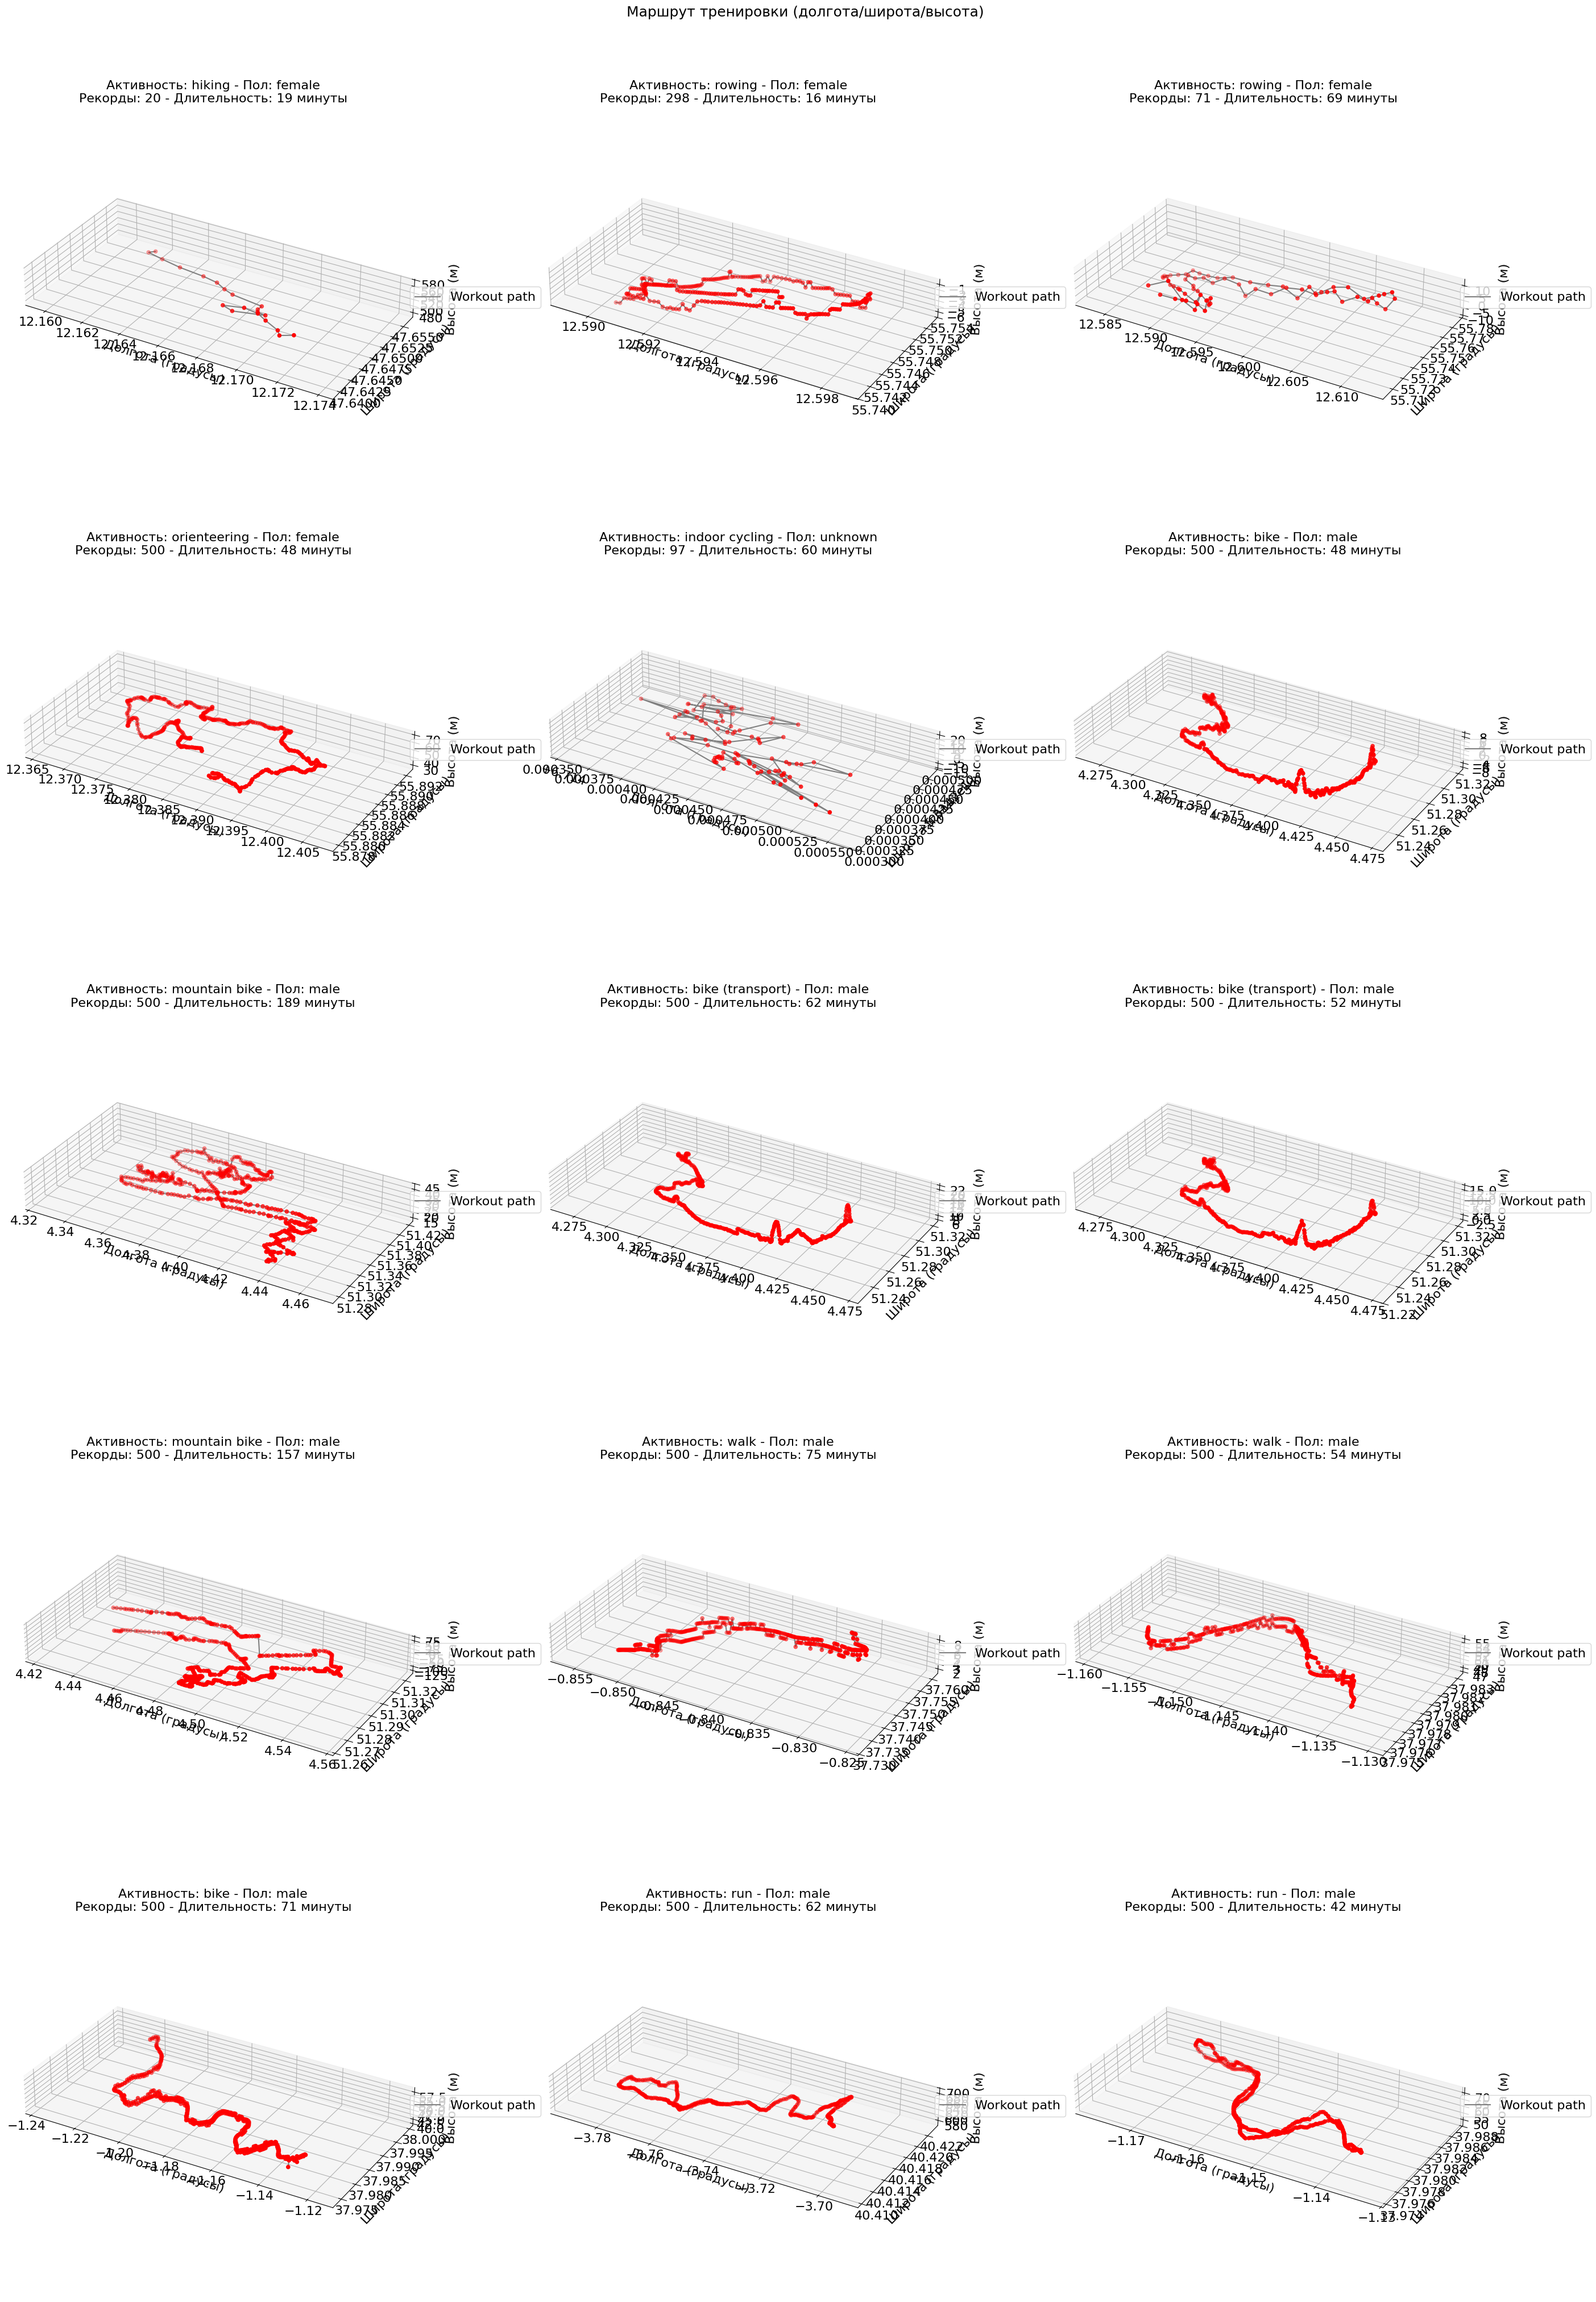

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.ticker as mtick
import numpy as np  # To use numpy functions for standard deviation

def get_fixed_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.
    return [mins, maxs]

workout_count = pd_df_small.shape[0]
ncols = 3
nrows = math.ceil(workout_count / ncols)

fig = plt.figure(figsize=(8 * (ncols + 0.5), 8 * nrows))
fig.subplots_adjust(hspace=0.2, wspace=0.5)

print('Построение траекторий тренировки в виде 3D для каждой тренировки:')
for row_index, row in pd_df_small.iterrows():
    min_long = min(row['longitude']) - np.std(row['longitude'])  # Use numpy.std()
    max_long = max(row['longitude']) + np.std(row['longitude'])  # Use numpy.std()
    minmax_long = get_fixed_mins_maxs(min_long, max_long)

    min_lat = min(row['latitude']) - np.std(row['latitude'])  # Use numpy.std()
    max_lat = max(row['latitude']) + np.std(row['latitude'])  # Use numpy.std()
    minmax_lat = get_fixed_mins_maxs(min_lat, max_lat)

    min_alt = min(row['altitude']) - np.std(row['altitude'])  # Use numpy.std()
    max_alt = max(row['altitude']) + np.std(row['altitude'])  # Use numpy.std()
    minmax_alt = get_fixed_mins_maxs(min_alt, max_alt)

    ax = fig.add_subplot(nrows, ncols, row_index + 1, projection='3d')

    title = 'Активность: ' + row['sport'] + ' - Пол: ' + row['gender'] + \
            '\nРекорды: ' + str(int(row['PerWorkoutRecordCount'])) + \
            ' - Длительность: ' + str(int(row['duration'])) + ' минуты'
    ax.set_title(title, fontsize=16)

    # Scatter plot for points
    scatter = ax.scatter(row['longitude'], row['latitude'], row['altitude'], c='r', marker='o')

    # Plot the workout path in 3D
    plot = ax.plot3D(row['longitude'], row['latitude'], row['altitude'], c='gray', label='Workout path')

    # Labels for the axes
    ax.set_xlabel('Долгота (градусы)', fontsize=16)
    ax.set_ylabel('Широта (градусы)', fontsize=16)
    ax.set_zlabel('Высота (м)', fontsize=16, rotation=0)

    # Set font size for ticks (accessing `label1` for the primary ticks)
    for t in ax.xaxis.get_major_ticks():
        t.label1.set_fontsize(16)
    for t in ax.yaxis.get_major_ticks():
        t.label1.set_fontsize(16)
    for t in ax.zaxis.get_major_ticks():
        t.label1.set_fontsize(16)

    # Add legends
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Set limits for each axis
    ax.set_xlim(minmax_long)
    ax.set_ylim(minmax_lat)
    if minmax_alt[0] != minmax_alt[1]:
        ax.set_zlim(minmax_alt)

    # Set aspect ratio for the plot (adjust these values as needed)
    ax.set_box_aspect([4, 2, 0.5])  # aspect ratio for x, y, z axes

    # Remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)

# Add a global title
fig.text(0.5, 1.02, "Маршрут тренировки (долгота/широта/высота)", ha='center', va='top', fontsize=18)

plt.tight_layout()
plt.show()

In [73]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler

# Индексация категориальных признаков
gender_indexer = StringIndexer(inputCol="gender", outputCol="gender_index")
sport_indexer = StringIndexer(inputCol="sport", outputCol="sport_index")

# One-hot encoding
gender_encoder = OneHotEncoder(inputCol="gender_index", outputCol="gender_vec")
sport_encoder = OneHotEncoder(inputCol="sport_index", outputCol="sport_vec")

# Объединение признаков
assembler = VectorAssembler(
    inputCols=["gender_vec", "sport_vec", "duration"],
    outputCol="raw_features"
)

# Масштабирование
scaler = StandardScaler(inputCol="raw_features", outputCol="features")

# Создание пайплайна
pipeline = Pipeline(stages=[
    gender_indexer, sport_indexer,
    gender_encoder, sport_encoder,
    assembler, scaler
])

# Применение пайплайна
model = pipeline.fit(df)
transformed_df = model.transform(df)


# ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ (по желанию)

# Анализ продолжительности тренировок
duration_stats = df.select('duration').toPandas().describe()
print("\nСтатистика продолжительности тренировок:")
print(duration_stats)

# Анализ по полу
gender_stats = df.groupBy('gender').count().toPandas()
print("\nРаспределение по полу:")
print(gender_stats)

# Закрытие Spark сессии (важно для освобождения ресурсов)
spark.stop()

print("\n" + "="*50)
print("АНАЛИЗ ЗАВЕРШЕН")
print("="*50)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 